# Welcome to Colab!

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
df=pd.read_csv("/content/survey_results_public.csv")
print(df.head(20))



    ResponseId                                         MainBranch  \
0            1                     I am a developer by profession   
1            2                     I am a developer by profession   
2            3                     I am a developer by profession   
3            4                              I am learning to code   
4            5                     I am a developer by profession   
5            6                        I code primarily as a hobby   
6            7  I am not primarily a developer, but I write co...   
7            8                              I am learning to code   
8            9                        I code primarily as a hobby   
9           10                     I am a developer by profession   
10          11  I used to be a developer by profession, but no...   
11          12                     I am a developer by profession   
12          13                     I am a developer by profession   
13          14  I used to be a dev

In [5]:
print(df.columns.values)

['ResponseId' 'MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check'
 'CodingActivities' 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc'
 'YearsCode' 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence'
 'BuyNewTool' 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdmired' 'OfficeSt

**Observation**

*   In our data we have 65437 rows and 114 columns.






In [6]:
print(df.shape)

(5956, 114)


In [7]:
print(df.shape)

(5956, 114)


**Observation**


*   The data have 65347 rows with many rows having non null values and some rows like age is not null.



In [8]:
print(df.describe())

        ResponseId     CompTotal      WorkExp  JobSatPoints_1  JobSatPoints_4  \
count  5956.000000  3.318000e+03  3228.000000     3240.000000     3238.000000   
mean   2978.500000  4.656217e+07    11.991326       17.930864        8.284898   
std    1719.493433  1.762499e+09     9.151850       25.132806       19.371922   
min       1.000000  0.000000e+00     0.000000        0.000000        0.000000   
25%    1489.750000  5.800000e+04     5.000000        0.000000        0.000000   
50%    2978.500000  1.020000e+05    10.000000       10.000000        0.000000   
75%    4467.250000  2.300000e+05    17.000000       20.000000       10.000000   
max    5956.000000  1.000000e+11    50.000000      100.000000      100.000000   

       JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  JobSatPoints_8  \
count     3246.000000     3250.000000     3247.000000     3249.000000   
mean        10.205676       24.144231       22.368994       20.042321   
std         22.027761       26.504875       26.6014

**Observation**


* statistical measure of the columns.



In [9]:


# display all column names to show available features
print("\nColumn Names:")
print(df.columns.values)

# display statistical summary of all numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Display dataset details
print("\nDataset Info:")
df.info()
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Identify columns with missing values
missing_values = df.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])


Column Names:
['ResponseId' 'MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check'
 'CodingActivities' 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc'
 'YearsCode' 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence'
 'BuyNewTool' 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdm

In [10]:
selected_columns = ['OrgSize','DevType','EdLevel','Employment','Frustration','TimeSearching','TimeAnswering','ConvertedCompYearly','ResponseId',
                    'MainBranch','Age','Country','WorkExp','YearsCodePro','CompTotal','RemoteWork']
selected_data = df[selected_columns]
duplicates = selected_data[selected_data.duplicated(subset=selected_columns, keep=False)]

print(f"There are {duplicates.shape[0]} duplicated rows.")
duplicates


There are 0 duplicated rows.


,OrgSize,DevType,EdLevel,Employment,Frustration,TimeSearching,TimeAnswering,ConvertedCompYearly,ResponseId,MainBranch,Age,Country,WorkExp,YearsCodePro,CompTotal,RemoteWork


**Observation**


*  Some column are selecting in given data set and find the duplicate rows.



In [11]:
selected_data['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

**Observation**

* To identify distinct categories with in features.



In [12]:
selected_data['TimeAnswering'].unique()

array([nan, '60-120 minutes a day', '15-30 minutes a day',
       '30-60 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [13]:
selected_data['CompTotal'].unique()

array([           nan, 2.04000000e+06, 2.80000000e+04, 8.50000000e+04,
       5.00000000e+04, 1.10000000e+05, 1.26420000e+05, 9.50000000e+04,
       1.95000000e+05, 3.50000000e+04, 5.40000000e+04, 1.45000000e+05,
       7.40000000e+04, 1.70000000e+05, 2.70000000e+04, 6.20000000e+04,
       8.00000000e+04, 9.80000000e+04, 2.30000000e+05, 1.60000000e+05,
       1.90000000e+05, 1.27000000e+05, 1.15000000e+05, 1.14000000e+06,
       6.50000000e+04, 1.20000000e+06, 9.48700000e+04, 3.00000000e+05,
       5.10000000e+04, 3.50000000e+05, 2.60000000e+04, 1.00000000e+05,
       2.00000000e+05, 1.40000000e+05, 9.00000000e+09, 4.50000000e+03,
       6.00000000e+03, 9.30000000e+04, 6.00000000e+06, 1.35000000e+05,
       5.50000000e+04, 1.65000000e+05, 8.40000000e+05, 1.02000000e+05,
       4.00000000e+06, 6.50000000e+02, 4.00000000e+04, 1.36000000e+05,
       4.50000000e+04, 3.00000000e+03, 1.50000000e+05, 4.30000000e+04,
       1.75000000e+05, 6.50000000e+05, 3.12000000e+04, 5.20000000e+04,
      

In [14]:
selected_data['EdLevel'].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else'],
      dtype=object)

In [15]:
selected_data['WorkExp'].unique()
#print(selected_data['WorkExp'].describe())

array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46.])

In [16]:
selected_data['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46'], dtype=object)

In [17]:
selected_data['ConvertedCompYearly'].unique()

array([    nan,   7322.,  30074., ..., 112000.,  85535.,  51374.])

**Univariate Analysis**
Numerical data

In [18]:
#calculate statistical Analysis
df['ConvertedCompYearly'].describe()

,ConvertedCompYearly
count,3.298000e+03
mean,8.689749e+04
std,8.793284e+04
min,1.000000e+00
25%,3.866600e+04
50%,7.000000e+04
75%,1.119255e+05
max,2.000000e+06


<Axes: ylabel='Frequency'>

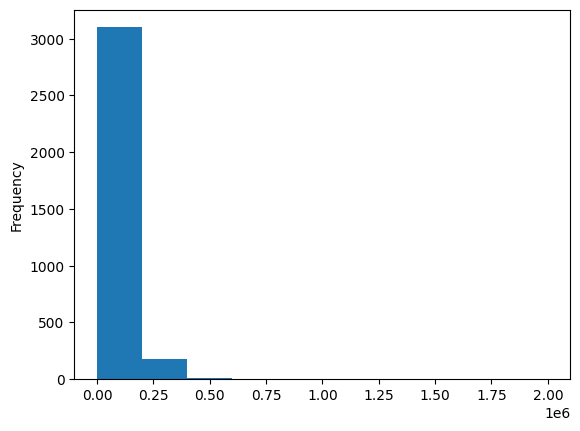

In [19]:
selected_data['ConvertedCompYearly'].plot(kind='hist',bins=10)

<Axes: ylabel='Density'>

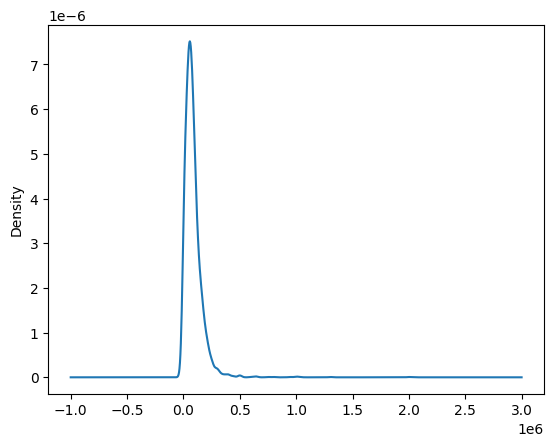

In [20]:
selected_data['ConvertedCompYearly'].plot(kind='kde')

In [21]:
selected_data['ConvertedCompYearly'].skew()

np.float64(6.575732440541882)

<Axes: >

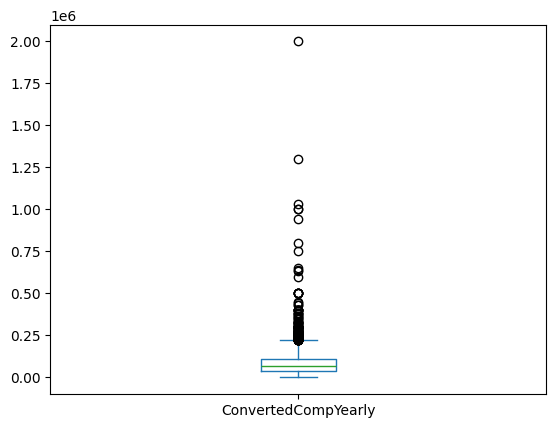

In [22]:
selected_data['ConvertedCompYearly'].plot(kind='box')

In [23]:
selected_data['ConvertedCompYearly'].isnull().sum()/len(selected_data['ConvertedCompYearly']*100)

np.float64(0.4462726662189389)





**conclusion**


*   convertedCompYearly is Right skewed.
*   64 % of value is missing.
*   there are some outliers.



In [24]:
selected_data['CompTotal'].describe()

,CompTotal
count,3.318000e+03
mean,4.656217e+07
std,1.762499e+09
min,0.000000e+00
25%,5.800000e+04
50%,1.020000e+05
75%,2.300000e+05
max,1.000000e+11


<Axes: ylabel='Frequency'>

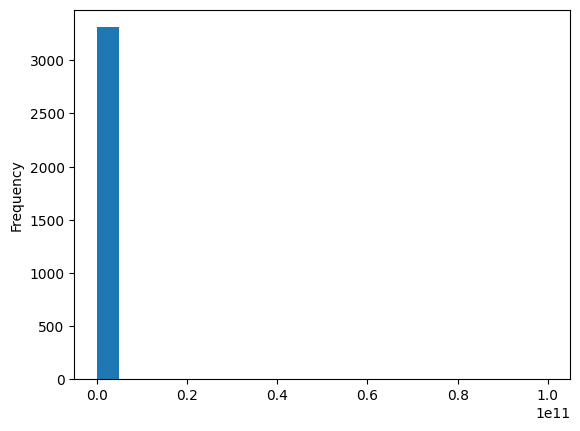

In [25]:
selected_data['CompTotal'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

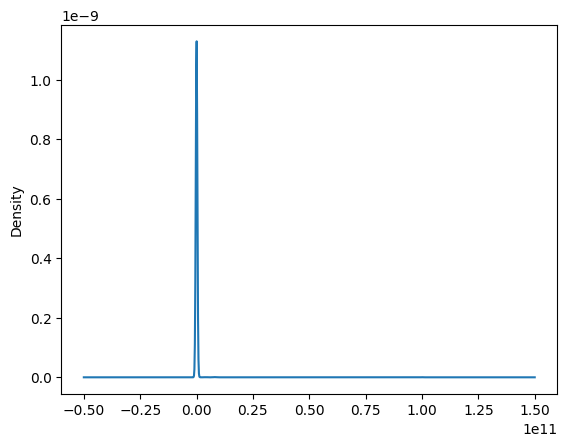

In [26]:
selected_data['CompTotal'].plot(kind='kde')

<Axes: >

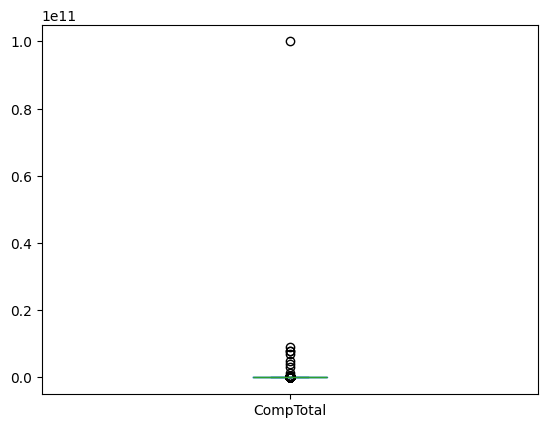

In [27]:
selected_data['CompTotal'].plot(kind='box')

In [28]:
selected_data['CompTotal'].skew()

np.float64(55.14495964986453)

In [29]:
selected_data['CompTotal'].isnull().sum()/len(selected_data['CompTotal']*100)

np.float64(0.44291470785762255)

**Conclusion**


*   48 % null value present.
*   Comptotal is Right skew.
*   There are some outliers.


In [30]:
selected_data['WorkExp'].describe()

,WorkExp
count,3228.000000
mean,11.991326
std,9.151850
min,0.000000
25%,5.000000
50%,10.000000
75%,17.000000
max,50.000000


<Axes: ylabel='Frequency'>

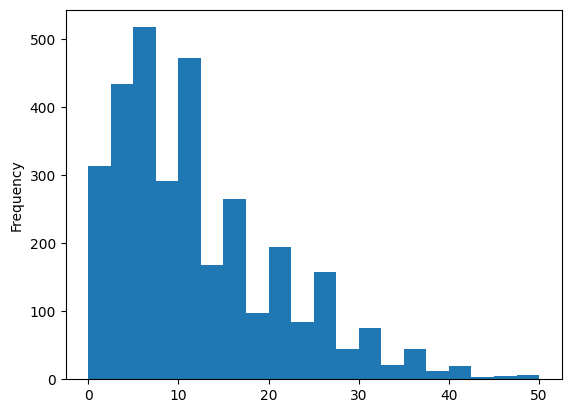

In [31]:
selected_data['WorkExp'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

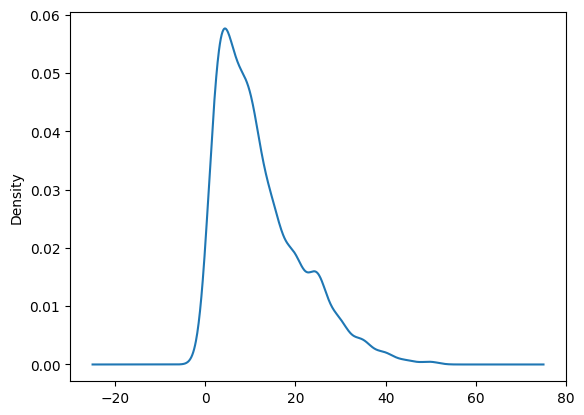

In [32]:
selected_data['WorkExp'].plot(kind='kde')

In [33]:
selected_data['WorkExp'].skew()

np.float64(1.119075433635556)

In [34]:
selected_data['WorkExp'].isnull().sum()/len(selected_data['WorkExp']*100)

np.float64(0.458025520483546)

<Axes: >

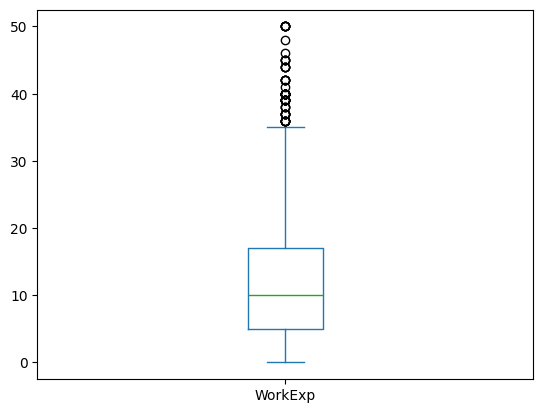

In [35]:
selected_data['WorkExp'].plot(kind='box')

In [36]:
selected_data[selected_data['WorkExp']>33]

,OrgSize,DevType,EdLevel,Employment,Frustration,TimeSearching,TimeAnswering,ConvertedCompYearly,ResponseId,MainBranch,Age,Country,WorkExp,YearsCodePro,CompTotal,RemoteWork
74,NaN,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Amount of technical debt;Maintaining security ...,Less than 15 minutes a day,Over 120 minutes a day,NaN,75,I am a developer by profession,55-64 years old,Switzerland,35.0,30,NaN,"Hybrid (some remote, some in-person)"
92,NaN,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Amount of technical debt;Tracking my work;Show...,30-60 minutes a day,60-120 minutes a day,NaN,93,I am a developer by profession,55-64 years old,United States of America,37.0,37,NaN,"Hybrid (some remote, some in-person)"
252,NaN,"Engineer, site reliability",Some college/university study without earning ...,"Employed, full-time",Amount of technical debt,60-120 minutes a day,15-30 minutes a day,NaN,253,"I am not primarily a developer, but I write co...",45-54 years old,Sweden,34.0,34,NaN,Remote
352,NaN,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Amount of technical debt;Reliability of tools/...,15-30 minutes a day,15-30 minutes a day,NaN,353,I am a developer by profession,55-64 years old,France,35.0,33,NaN,Remote
397,NaN,Engineering manager,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Maintaining security of code being produced;Ma...,30-60 minutes a day,15-30 minutes a day,NaN,398,"I am not primarily a developer, but I write co...",55-64 years old,United States of America,44.0,40,NaN,Remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,20 to 99 employees,Research & Development role,Some college/university study without earning ...,"Employed, full-time",Amount of technical debt;Complexity of tech st...,15-30 minutes a day,30-60 minutes a day,NaN,5642,I am a developer by profession,55-64 years old,South Africa,34.0,35,NaN,"Hybrid (some remote, some in-person)"
5744,100 to 499 employees,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Amount of technical debt;Patching/updating cor...,Less than 15 minutes a day,15-30 minutes a day,140000.0,5745,I am a developer by profession,55-64 years old,United States of America,39.0,34,140000.0,Remote
5832,"10,000 or more employees","Developer, full-stack","Associate degree (A.A., A.S., etc.)","Employed, full-time",Number of software tools in use;Complexity of ...,15-30 minutes a day,30-60 minutes a day,143000.0,5833,I am a developer by profession,55-64 years old,United States of America,46.0,42,143000.0,Remote
5857,"1,000 to 4,999 employees","Developer, desktop or enterprise applications","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Amount of technical debt;Number of software to...,30-60 minutes a day,15-30 minutes a day,NaN,5858,I am a developer by profession,55-64 years old,United States of America,36.0,31,NaN,"Hybrid (some remote, some in-person)"


**Conclusion**


*   WorkExp 0 to 15 year are more developers
*   There is not normally distributed and replace the missing value by median.
*   54 % value are missing.


**Univarate** Analysis
categorical variable

In [37]:
selected_data['DevType'].value_counts()

,count
DevType,
"Developer, full-stack",1920
"Developer, back-end",997
Student,382
"Developer, front-end",317
"Developer, desktop or enterprise applications",277
Other (please specify):,226
"Developer, mobile",221
"Developer, embedded applications or devices",152
Engineering manager,133


<Axes: xlabel='DevType'>

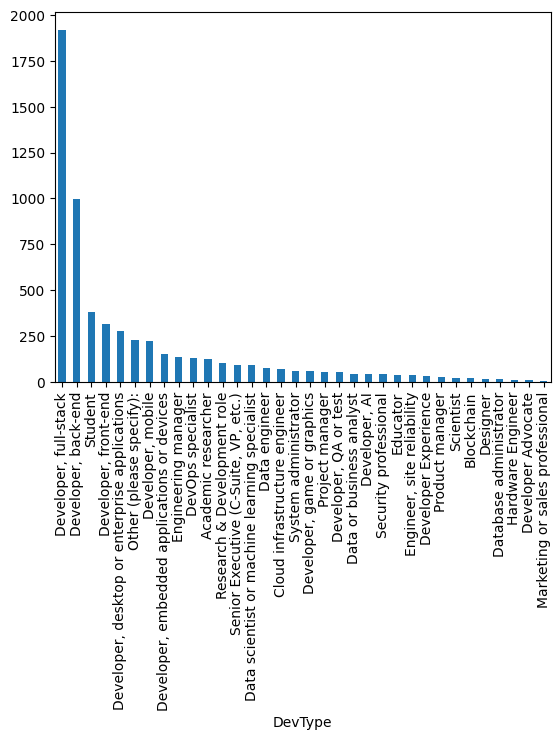

In [38]:
selected_data['DevType'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

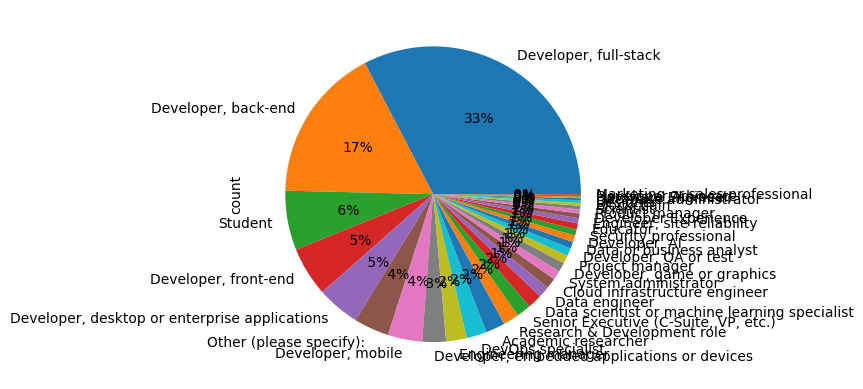

In [39]:
selected_data['DevType'].value_counts().plot(kind='pie',autopct='%2.0f%%')

In [40]:
selected_data['DevType'].isnull().sum()/len(selected_data['DevType']*100)


np.float64(0.012928139691067831)

**Conclusion**


*   9 % missing value are present and replace by others




In [41]:
selected_data['Country'].value_counts()

,count
Country,
United States of America,1137
Germany,520
United Kingdom of Great Britain and Northern Ireland,370
India,357
Ukraine,311
...,...
Panama,1
Somalia,1
North Korea,1


<Axes: xlabel='Country'>

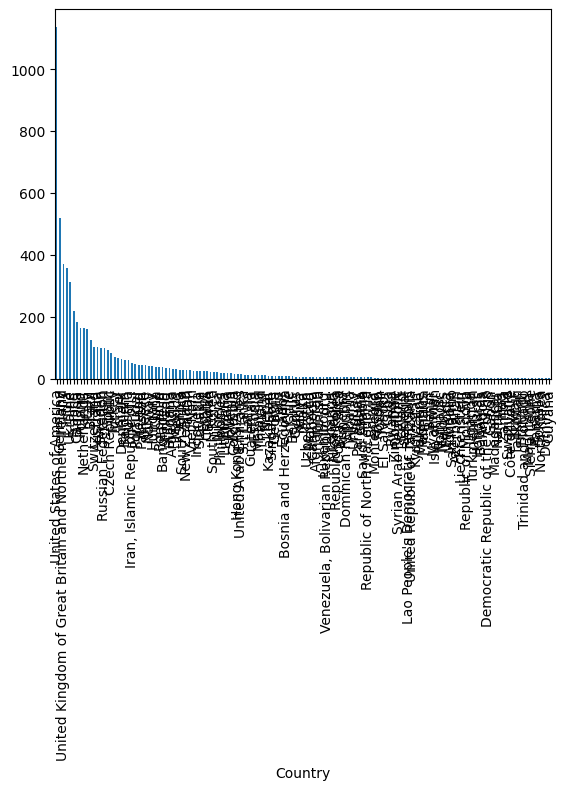

In [42]:
selected_data['Country'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Country'}, ylabel='count'>

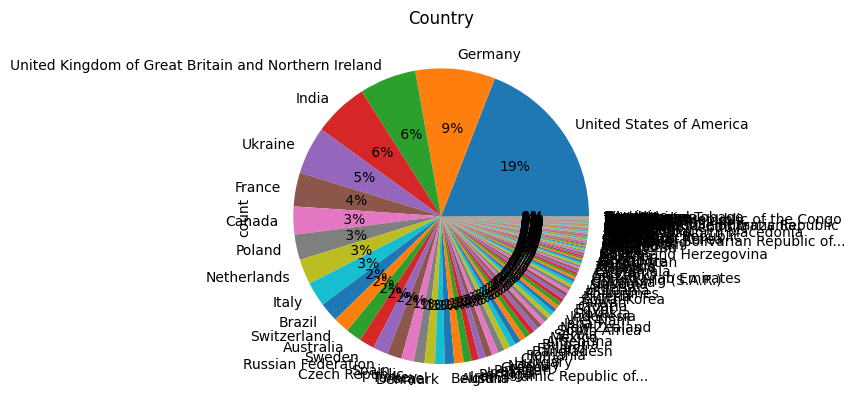

In [43]:
selected_data['Country'].value_counts().plot(kind='pie', title='Country',autopct='%2.0f%%')

In [44]:
selected_data['Country'].isnull().sum()/len(selected_data['Country']*100)

np.float64(0.0)

**Conclusion **
* Many Frequent Country are selected and less frequent country are included in Others.


In [45]:
def select_countries(x):
    if x == "United States of America":
        x = "USA"
    elif x == "United Kingdom of Great Britain and Northern Ireland":
        x = "UK"
    elif x == "India":
        x = "India"
    elif x == "Germany":
        x = "Germany"
    else:
        x = "Others"
    return x

selected_data['mostCountry']  = selected_data['Country'].astype(str)
selected_data['mostCountry'] = selected_data['Country'].apply(lambda x: select_countries(x))
selected_data['mostCountry'].head()

# --- Code added to address ValueError for 'TimeSearching' ---
# Define a mapping for 'TimeSearching' to numerical values (midpoints in minutes)
time_searching_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45.0,
    '60-120 minutes a day': 90.0,
    'Over 120 minutes a day': 150.0 # Assign an arbitrary value greater than 120
}

# Apply the mapping to 'TimeSearching' column in the original df
df['TimeSearching_numeric'] = df['TimeSearching'].map(time_searching_mapping)

# Also apply to selected_data if it's going to be used for correlation in future steps
selected_data['TimeSearching_numeric'] = selected_data['TimeSearching'].map(time_searching_mapping)


/tmp/ipython-input-2149803097.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['mostCountry']  = selected_data['Country'].astype(str)
/tmp/ipython-input-2149803097.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['mostCountry'] = selected_data['Country'].apply(lambda x: select_countries(x))
/tmp/ipython-input-2149803097.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

<Axes: title={'center': 'Country'}, ylabel='count'>

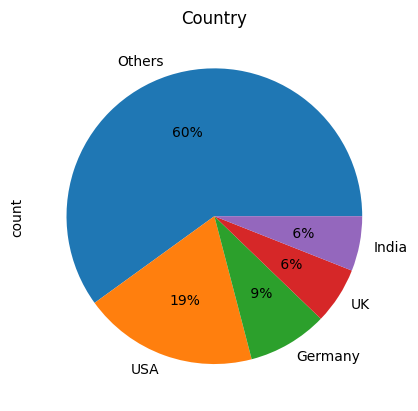

In [46]:
selected_data['mostCountry'].value_counts().plot(kind = 'pie', title = 'Country', autopct='%2.0f%%')

**Conclusion**


*   Compute the country with other.



In [47]:
selected_data['MainBranch'].value_counts()

,count
MainBranch,
I am a developer by profession,4782
"I am not primarily a developer, but I write code sometimes as part of my work/studies",556
I code primarily as a hobby,271
I am learning to code,194
"I used to be a developer by profession, but no longer am",153


<Axes: xlabel='MainBranch'>

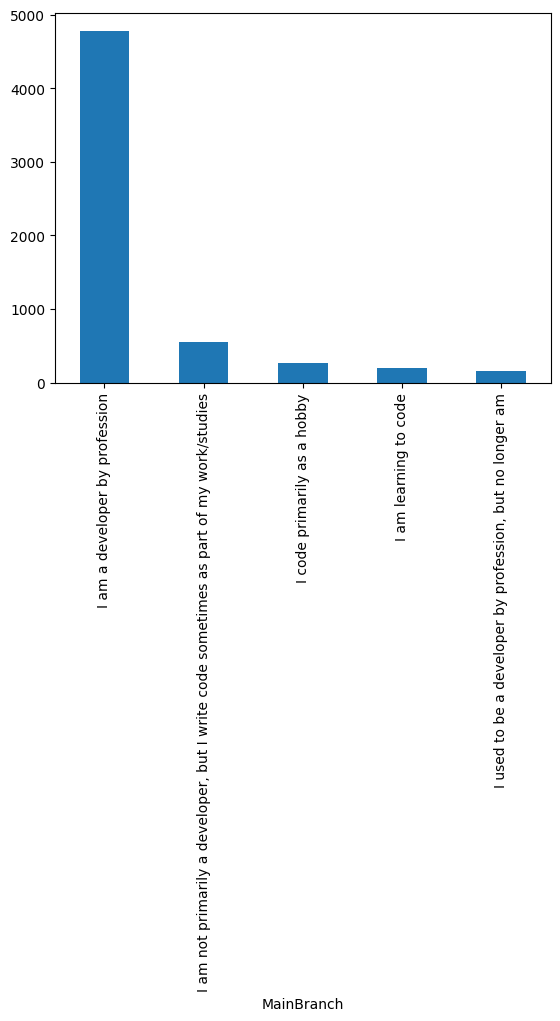

In [48]:
selected_data['MainBranch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

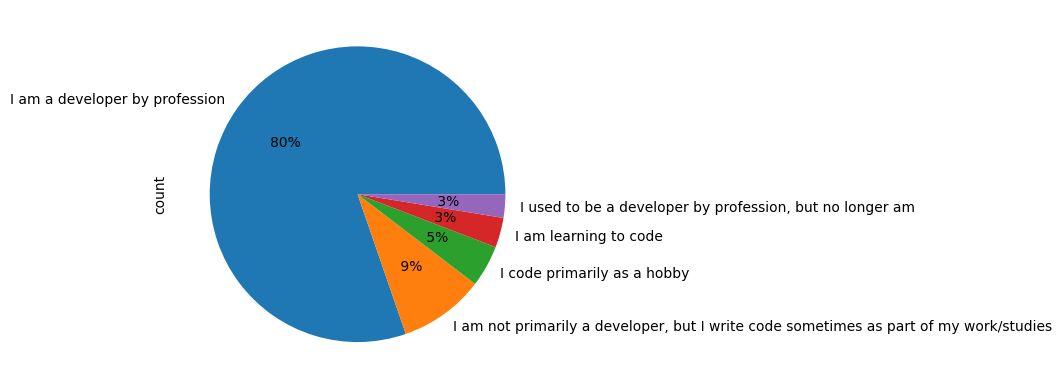

In [49]:
selected_data['MainBranch'].value_counts().plot(kind='pie',autopct='%2.0f%%')

In [50]:
selected_data['MainBranch'].isnull().sum()/len(selected_data['MainBranch']*100)

np.float64(0.0)

**Conclusion**


*   There is no missing value in mainbranch
*   I am developer by profession is 77 % is maximum branch.



In [51]:
selected_data['Age'].value_counts()

,count
Age,
25-34 years old,2210
35-44 years old,1487
18-24 years old,1039
45-54 years old,663
55-64 years old,269
Under 18 years old,171
65 years or older,83
Prefer not to say,34


In [52]:
age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7,
    "Prefer not to say": 8}
selected_data_copy = selected_data.copy()
selected_data_copy['Age_encoded'] = selected_data_copy['Age'].map(age_mapping)

# Get value counts of the encoded Age column and sort by the encoded index
age_counts_sorted = selected_data_copy['Age_encoded'].value_counts().sort_index()

# Define the labels for the x-axis based on the age_mapping
age_labels = {
    1: "Under 18",
    2: "18-24",
    3: "25-34",
    4: "35-44",
    5: "45-54",
    6: "55-64",
    7: "65 or older",
    8: "Prefer not to say"}


Text(0, 0.5, 'Count')

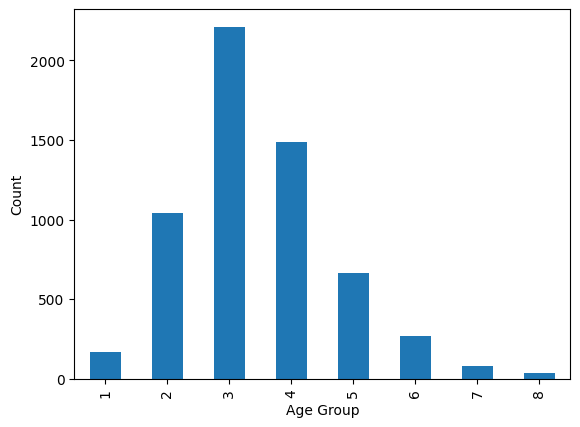

In [53]:
selected_data_copy['Age_encoded'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')

<Axes: ylabel='count'>

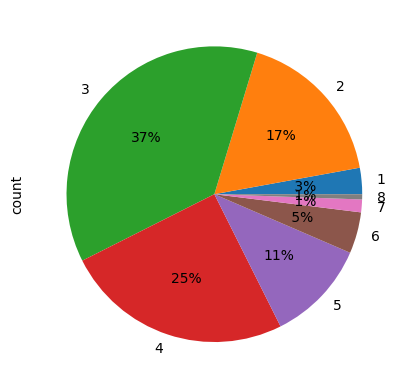

In [54]:
selected_data_copy['Age_encoded'].value_counts().sort_index().plot(kind='pie',autopct='%2.0f%%')

In [55]:
selected_data_copy['Age_encoded'].isnull().sum()/len(selected_data['Age']*100)

np.float64(0.0)

**Conclusion**


*   There is no miissing value.




In [56]:
selected_data['EdLevel'].value_counts()

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2430
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1591
Some college/university study without earning a degree,754
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",495
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",306
"Associate degree (A.A., A.S., etc.)",188
Primary/elementary school,101
Something else,91


<Axes: xlabel='EdLevel'>

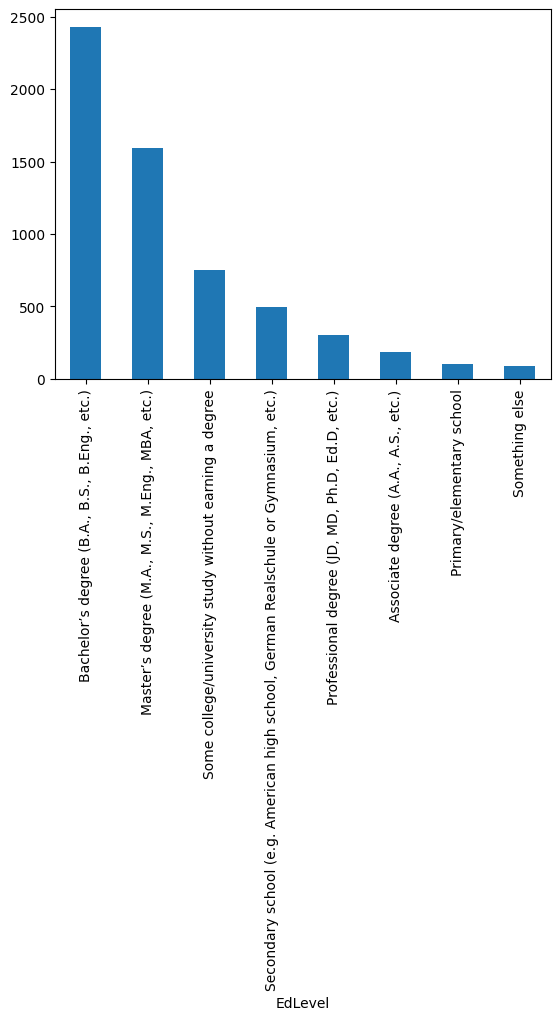

In [57]:
selected_data['EdLevel'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

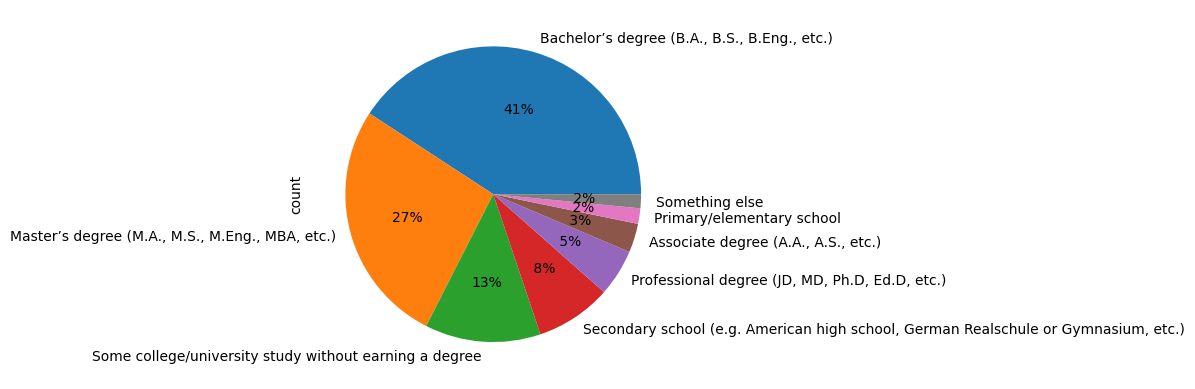

In [58]:
selected_data['EdLevel'].value_counts().plot(kind='pie',autopct='%2.0f%%')

In [59]:
selected_data['EdLevel'].isnull().sum()/len(selected_data['EdLevel']*100)

np.float64(0.0)

7% missing value are present.


In [60]:
selected_data['RemoteWork'].value_counts()

,count
RemoteWork,
Remote,2162
"Hybrid (some remote, some in-person)",2008
In-person,955


<Axes: xlabel='RemoteWork'>

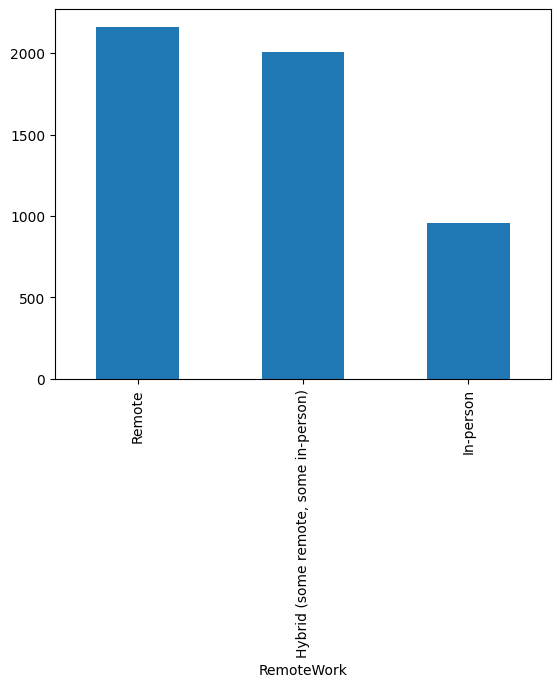

In [61]:
selected_data['RemoteWork'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

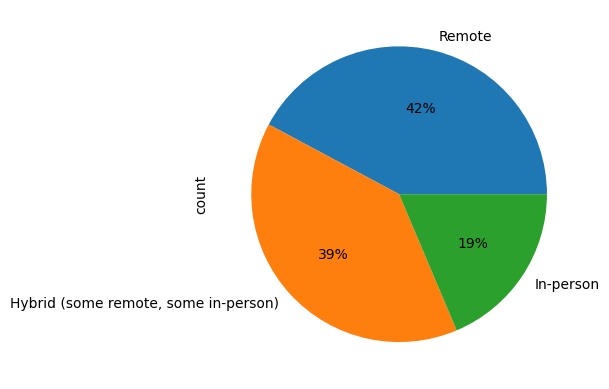

In [62]:
selected_data['RemoteWork'].value_counts().plot(kind='pie',autopct='%2.0f%%')

In [63]:
selected_data['RemoteWork'].isnull().sum()/len(selected_data['RemoteWork']*100)

np.float64(0.1395231699126931)

**Conclusion**
* There are 16% missing value .
* Maximum person are working in hybrid mode.


In [64]:
selected_data['TimeSearching'].value_counts()

,count
TimeSearching,
30-60 minutes a day,1185
15-30 minutes a day,915
60-120 minutes a day,542
Less than 15 minutes a day,347
Over 120 minutes a day,191


<Axes: xlabel='TimeSearching'>

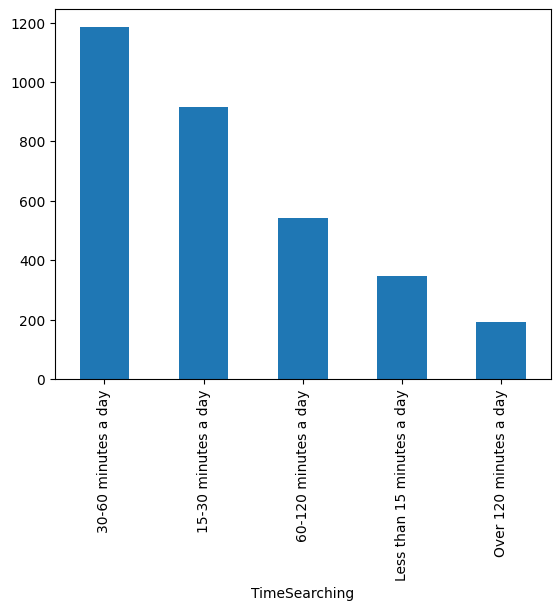

In [65]:
selected_data['TimeSearching'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

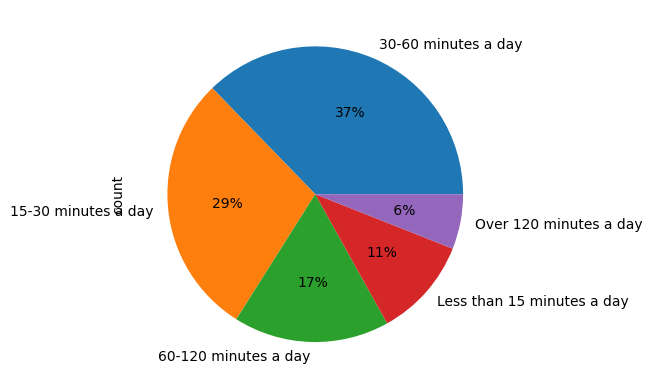

In [66]:
selected_data['TimeSearching'].value_counts().plot(kind='pie',autopct='%2.0f%%')

In [67]:
selected_data['TimeSearching'].isnull().sum()/len(selected_data['TimeSearching']*100)

np.float64(0.46608462055070515)

**Conclusion**
* 55% missing value.

55% missing value

/tmp/ipython-input-3297989376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['YearsCodePro'] = pd.to_numeric(selected_data['YearsCodePro'], errors='coerce')
/tmp/ipython-input-3297989376.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['CodeproGroup'] = selected_data['YearsCodePro'].apply(lambda x: group_experience(x))


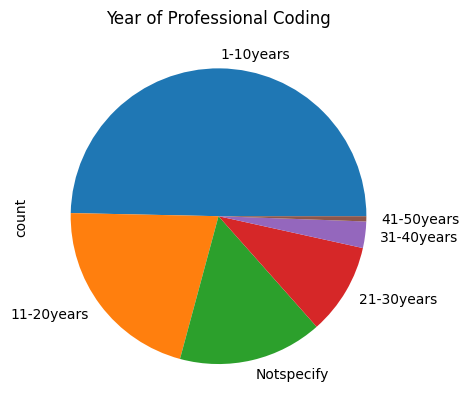

In [68]:
def group_experience(x):
    if x < 1:
        return "0-1"
    elif x > 50:
        return "50+"
    else:
        if 41 <= x <=50:
            return "41-50years"
        elif 31 <= x <= 40:
            return "31-40years"
        elif 21 <= x <= 30:
            return "21-30years"
        elif 11 <= x <= 20:
            return "11-20years"
        elif 1 <= x <= 10:
            return "1-10years"
        return "Notspecify"

# Ensure YearsCodePro is numeric
selected_data['YearsCodePro'] = pd.to_numeric(selected_data['YearsCodePro'], errors='coerce')
selected_data['CodeproGroup'] = selected_data['YearsCodePro'].apply(lambda x: group_experience(x))


selected_data['CodeproGroup'].value_counts().plot(kind='pie', title='Year of Professional Coding')

plt.show()


**Conclusion**
* Maximum year of professional Coding is 1 to 10 years.

/tmp/ipython-input-2517094433.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['mostEmployment'] = selected_data['Employment'].astype(str)
/tmp/ipython-input-2517094433.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['mostEmployment'] = selected_data['mostEmployment'].apply(lambda x: select_employments(x))
/tmp/ipython-input-2517094433.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable t

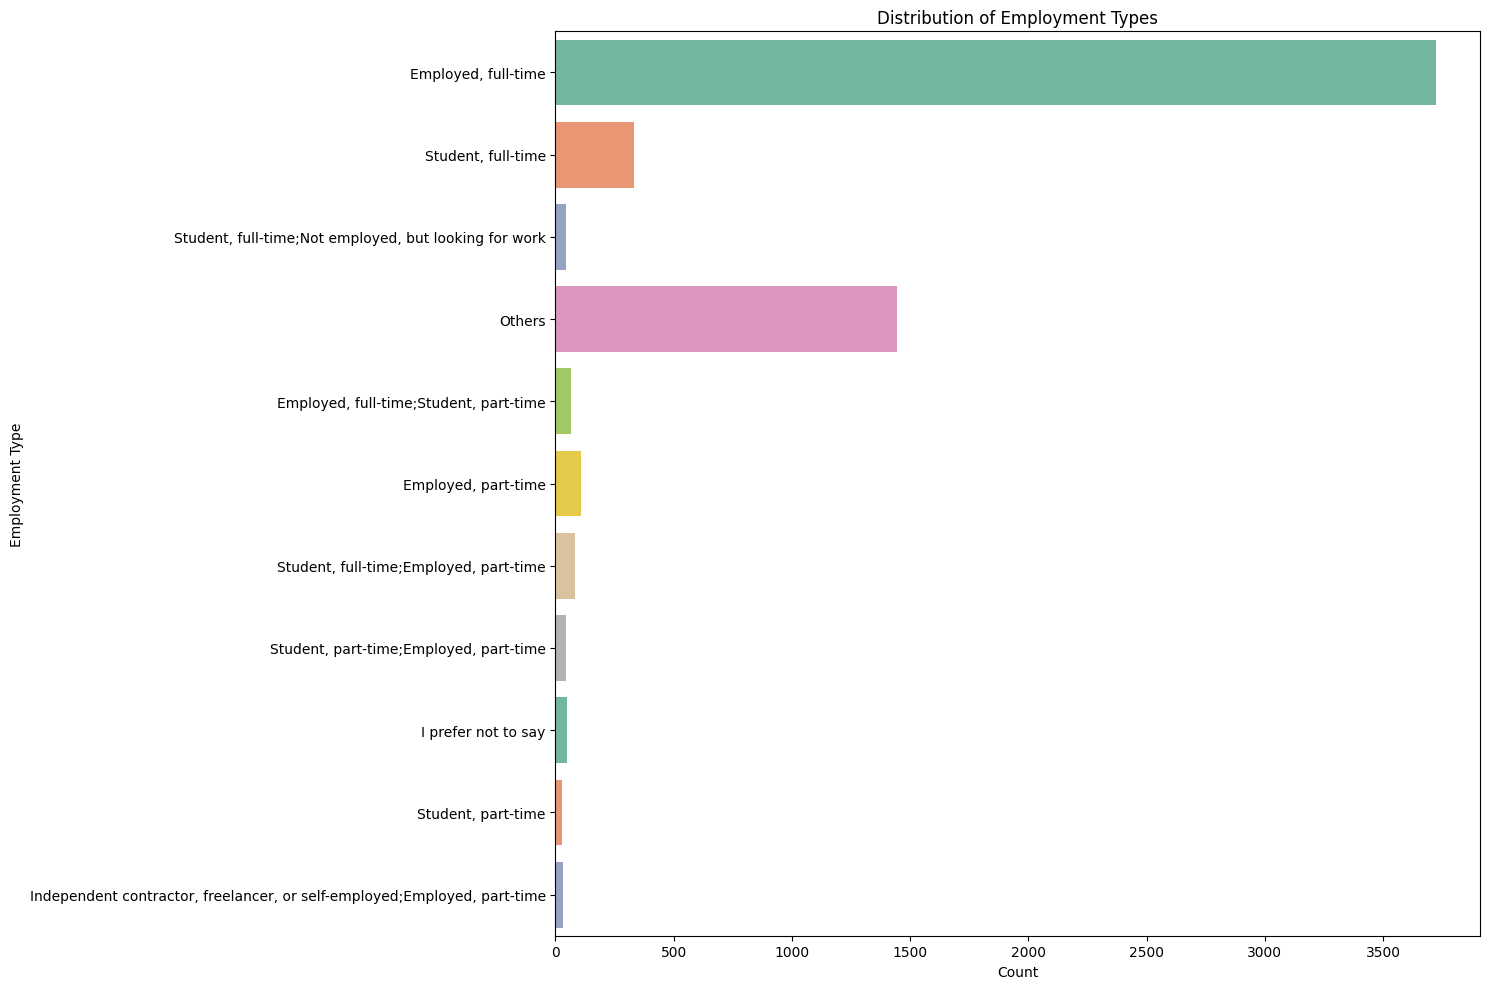

mostEmployment
Employed, full-time                                                         3724
Others                                                                      1445
Student, full-time                                                           333
Employed, part-time                                                          107
Student, full-time;Employed, part-time                                        83
Employed, full-time;Student, part-time                                        67
I prefer not to say                                                           48
Student, part-time;Employed, part-time                                        44
Student, full-time;Not employed, but looking for work                         43
Independent contractor, freelancer, or self-employed;Employed, part-time      34
Student, part-time                                                            28


In [69]:

def select_employments(x):
    if x == "Employed, full-time":
        return x
    elif x == "Independent contractor, freelancer, or self-employed  ":
        return x
    elif x == "Student, full-time":
        return x
    elif x == "Employed, full-time;Independent contractor, freelancer, or self-employed   ":
        return x
    elif x == "Employed, part-time":
        return x
    elif x == "Student, full-time;Employed, part-time":
        return x
    elif x == "Employed, full-time;Student, full-time  ":
        return x
    elif x == "Employed, full-time;Student, part-time":
        return x
    elif x == "Student, full-time;Not employed, but looking for work":
        return x
    elif x == "Student, part-time;Employed, part-time":
        return x
    elif x == "I prefer not to say":
        return x
    elif x == "Student, part-time":
        return x
    elif x == "Independent contractor, freelancer, or self-employed;Employed, part-time":
        return x
    else:
        x = "Others"
    return x

# Apply the function to the 'Employment' column and create a new column 'mostEmployment'
selected_data['mostEmployment'] = selected_data['Employment'].astype(str)
selected_data['mostEmployment'] = selected_data['mostEmployment'].apply(lambda x: select_employments(x))
# Count Plot
plt.figure(figsize=(15, 10))
sns.countplot(y='mostEmployment', data=selected_data, palette="Set2")
plt.title('Distribution of Employment Types')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.tight_layout()
plt.show()

# Display the counts
print(selected_data['mostEmployment'].value_counts().to_string())

In [70]:

# Salary ko median se fill karein
selected_data = selected_data.dropna(subset='ConvertedCompYearly')

# Salary ko median se fill karein
selected_data = selected_data.dropna(subset='ConvertedCompYearly')

# WorkExp aur YearsCodePro ko bhi median se fill karein
selected_data['WorkExp'] = selected_data['WorkExp'].fillna(selected_data['WorkExp'].median())

# Categorical columns ko placeholder se bharein
categorical_cols = ['DevType','EdLevel','TimeAnswering'
                    ,'TimeSearching'
                    ]
for col in categorical_cols:
    selected_data[col] = selected_data[col].fillna('other(Not Specific)')
cate_col1s=['RemoteWork','Frustration',]
for col1 in cate_col1s:
    selected_data[col1]=selected_data[col1].fillna('none')
#print(f"Original data rows:{len(df)}")
 #missing data
selected_data.isnull().sum()

,0
OrgSize,6
DevType,0
EdLevel,0
Employment,0
Frustration,0
TimeSearching,0
TimeAnswering,0
ConvertedCompYearly,0
ResponseId,0
MainBranch,0


In [71]:
selected_data['YearsCodePro'].fillna(selected_data['YearsCodePro'].mode()[0], inplace=True)

selected_data.isnull().sum()

/tmp/ipython-input-2558038831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_data['YearsCodePro'].fillna(selected_data['YearsCodePro'].mode()[0], inplace=True)


,0
OrgSize,6
DevType,0
EdLevel,0
Employment,0
Frustration,0
TimeSearching,0
TimeAnswering,0
ConvertedCompYearly,0
ResponseId,0
MainBranch,0


In [72]:
age_mapping = {
    "Under 18 years old" : 1,
    "18-24 years old" : 2,
    "25-34 years old" : 3,
    "35-44 years old" : 4,
    "45-54 years old" : 5,
    "55-64 years old" : 6,
    "65 years or older" : 7,
    "Prefer not to say" : 8
}
df['Age'] = df['Age'].map(age_mapping)




In [73]:

selected_data['Frustration'].describe()

,Frustration
count,3298
unique,440
top,none
freq,1069


**Observation**


*   Detact the outlier and remove the outlier using IQR method




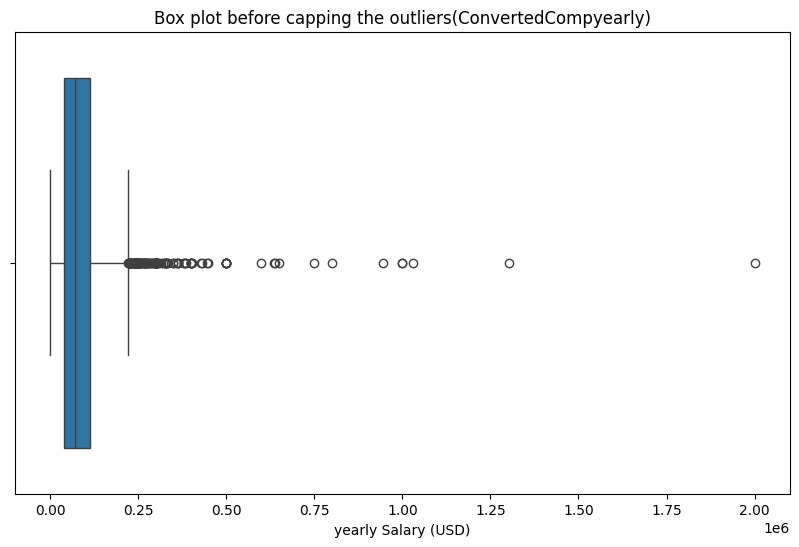

In [74]:


plt.figure(figsize=(10,6))
sns.boxplot(x=selected_data['ConvertedCompYearly'])
plt.title("Box plot before capping the outliers(ConvertedCompyearly)")
plt.xlabel("yearly Salary (USD)")
plt.show()

In [131]:
import pandas as pd
import numpy as np
# 1. Q1 और Q3 कैलकुलेट करें
Q1 = selected_data['ConvertedCompYearly'].quantile(0.25)
Q3 = selected_data['ConvertedCompYearly'].quantile(0.75)

# 2. IQR निकालें
IQR = Q3 - Q1

# 3. सीमाओं (Bounds) को परिभाषित करें
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


selected_data['ConvertedCompYearly_capped'] = selected_data['ConvertedCompYearly'].clip(lower=lower_bound, upper=upper_bound)
print(selected_data['ConvertedCompYearly_capped'].describe())

Lower Bound: -71223.25
Upper Bound: 221814.75
count      3298.000000
mean      81396.937159
std       58143.299700
min           1.000000
25%       38666.000000
50%       70000.000000
75%      111925.500000
max      221814.750000
Name: ConvertedCompYearly_capped, dtype: float64


<Axes: ylabel='Density'>

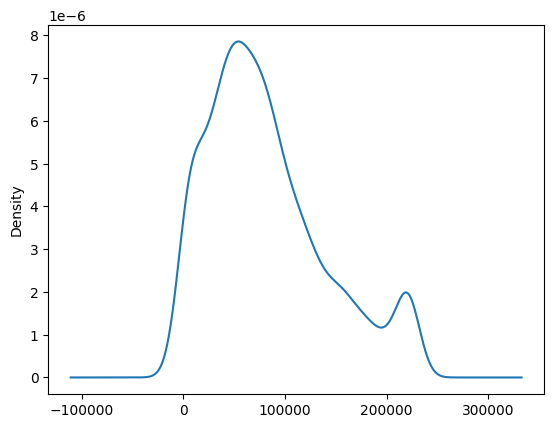

In [77]:
selected_data['ConvertedCompYearly_capped'].plot(kind='kde')

In [78]:
import pandas as pd
import numpy as np
# 1. Q1 और Q3 कैलकुलेट करें
Q1 = selected_data['CompTotal'].quantile(0.25)
Q3 = selected_data['CompTotal'].quantile(0.75)

# 2. IQR निकालें
IQR = Q3 - Q1

# 3. सीमाओं (Bounds) को परिभाषित करें
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


selected_data['CompTotal_capped'] = selected_data['CompTotal'].clip(lower=lower_bound, upper=upper_bound)
print(selected_data['CompTotal_capped'].describe())
selected_data.head()


Lower Bound: -205000.0
Upper Bound: 499000.0
count      3298.000000
mean     180162.735597
std      168985.392204
min           1.000000
25%       59000.000000
50%      103000.000000
75%      235000.000000
max      499000.000000
Name: CompTotal_capped, dtype: float64


,OrgSize,DevType,EdLevel,Employment,Frustration,TimeSearching,TimeAnswering,ConvertedCompYearly,ResponseId,MainBranch,...,WorkExp,YearsCodePro,CompTotal,RemoteWork,mostCountry,TimeSearching_numeric,CodeproGroup,mostEmployment,ConvertedCompYearly_capped,CompTotal_capped
72,100 to 499 employees,Data scientist or machine learning specialist,"Secondary school (e.g. American high school, G...","Employed, full-time;Student, full-time;Indepen...",Amount of technical debt;Number of software to...,30-60 minutes a day,60-120 minutes a day,7322.0,73,I am a developer by profession,...,3.0,1.0,2040000.0,"Hybrid (some remote, some in-person)",Others,45.0,1-10years,Others,7322.0,499000.0
374,100 to 499 employees,Academic researcher,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",none,other(Not Specific),other(Not Specific),30074.0,375,"I am not primarily a developer, but I write co...",...,10.0,6.0,28000.0,"Hybrid (some remote, some in-person)",Others,NaN,1-10years,"Employed, full-time",30074.0,28000.0
379,20 to 99 employees,Data scientist or machine learning specialist,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Complexity of tech stack for build,Less than 15 minutes a day,Less than 15 minutes a day,91295.0,380,I am a developer by profession,...,7.0,6.0,85000.0,Remote,Others,7.5,1-10years,"Employed, full-time",91295.0,85000.0
385,"Just me - I am a freelancer, sole proprietor, ...","Developer, back-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",none,other(Not Specific),other(Not Specific),53703.0,386,I am a developer by profession,...,10.0,17.0,50000.0,Remote,Others,NaN,11-20years,Others,53703.0,50000.0
389,10 to 19 employees,Student,Some college/university study without earning ...,"Employed, full-time;Student, part-time",Number of software tools in use;Tracking my work,60-120 minutes a day,Less than 15 minutes a day,110000.0,390,I am a developer by profession,...,8.0,7.0,110000.0,Remote,USA,90.0,1-10years,"Employed, full-time;Student, part-time",110000.0,110000.0


<Axes: >

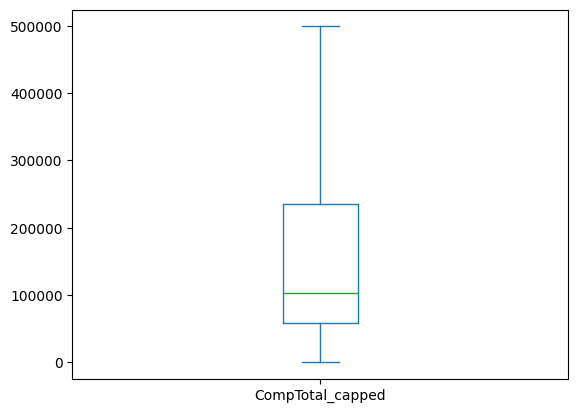

In [79]:
selected_data['CompTotal_capped'].plot(kind='box')

<Axes: ylabel='Density'>

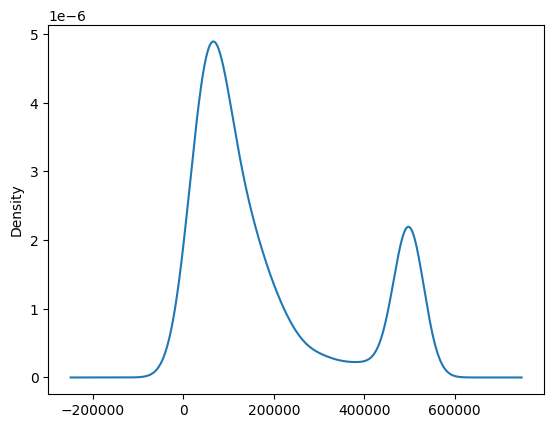

In [80]:
selected_data['CompTotal_capped'].plot(kind='kde')

Bivariate **approach**

**Country vs Comptotal**

   





In [81]:
selected_data.head()

,OrgSize,DevType,EdLevel,Employment,Frustration,TimeSearching,TimeAnswering,ConvertedCompYearly,ResponseId,MainBranch,...,WorkExp,YearsCodePro,CompTotal,RemoteWork,mostCountry,TimeSearching_numeric,CodeproGroup,mostEmployment,ConvertedCompYearly_capped,CompTotal_capped
72,100 to 499 employees,Data scientist or machine learning specialist,"Secondary school (e.g. American high school, G...","Employed, full-time;Student, full-time;Indepen...",Amount of technical debt;Number of software to...,30-60 minutes a day,60-120 minutes a day,7322.0,73,I am a developer by profession,...,3.0,1.0,2040000.0,"Hybrid (some remote, some in-person)",Others,45.0,1-10years,Others,7322.0,499000.0
374,100 to 499 employees,Academic researcher,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Employed, full-time",none,other(Not Specific),other(Not Specific),30074.0,375,"I am not primarily a developer, but I write co...",...,10.0,6.0,28000.0,"Hybrid (some remote, some in-person)",Others,NaN,1-10years,"Employed, full-time",30074.0,28000.0
379,20 to 99 employees,Data scientist or machine learning specialist,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Complexity of tech stack for build,Less than 15 minutes a day,Less than 15 minutes a day,91295.0,380,I am a developer by profession,...,7.0,6.0,85000.0,Remote,Others,7.5,1-10years,"Employed, full-time",91295.0,85000.0
385,"Just me - I am a freelancer, sole proprietor, ...","Developer, back-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",none,other(Not Specific),other(Not Specific),53703.0,386,I am a developer by profession,...,10.0,17.0,50000.0,Remote,Others,NaN,11-20years,Others,53703.0,50000.0
389,10 to 19 employees,Student,Some college/university study without earning ...,"Employed, full-time;Student, part-time",Number of software tools in use;Tracking my work,60-120 minutes a day,Less than 15 minutes a day,110000.0,390,I am a developer by profession,...,8.0,7.0,110000.0,Remote,USA,90.0,1-10years,"Employed, full-time;Student, part-time",110000.0,110000.0


scatterplot (numerical-numerical)

In [82]:
print(selected_data.columns.values)

['OrgSize' 'DevType' 'EdLevel' 'Employment' 'Frustration' 'TimeSearching'
 'TimeAnswering' 'ConvertedCompYearly' 'ResponseId' 'MainBranch' 'Age'
 'Country' 'WorkExp' 'YearsCodePro' 'CompTotal' 'RemoteWork' 'mostCountry'
 'TimeSearching_numeric' 'CodeproGroup' 'mostEmployment'
 'ConvertedCompYearly_capped' 'CompTotal_capped']


**Observation**
* Box Plot between Employment and ConvertedCompYearly_capped

/tmp/ipython-input-1817363809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(selected_data,x='Employment',y='ConvertedCompYearly_capped',palette='viridis')


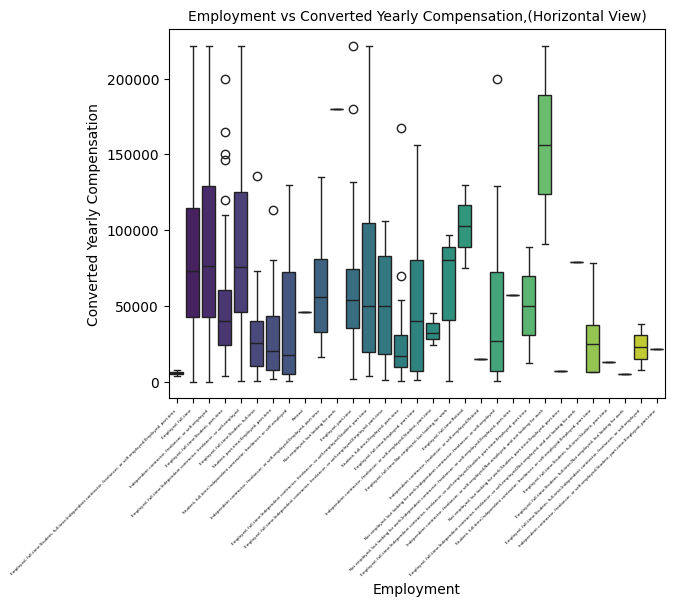

<Figure size 200x200 with 0 Axes>

In [83]:
sns.boxplot(selected_data,x='Employment',y='ConvertedCompYearly_capped',palette='viridis')
plt.title('Employment vs Converted Yearly Compensation,(Horizontal View)',fontsize=10)
plt.xlabel('Employment',fontsize=10)
plt.ylabel('Converted Yearly Compensation',fontsize=10)
plt.xticks(rotation=45,ha='right',fontsize=3)
plt.figure(figsize=(2,2))
plt.show()

**Observation**
* Scatterplot of Work Experience and Capped converted yearly Compensation.

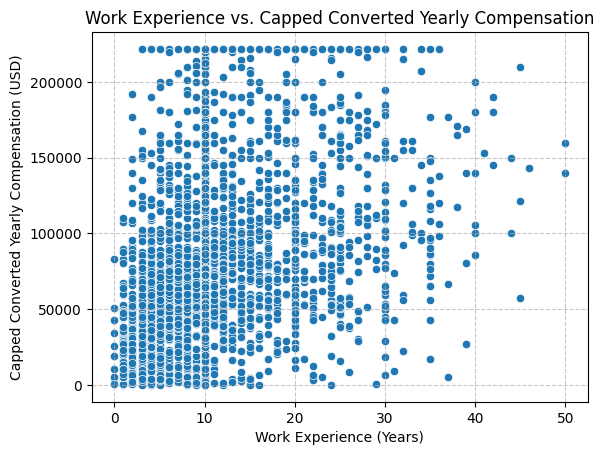

In [84]:
sns.scatterplot(x=selected_data['WorkExp'], y=selected_data['ConvertedCompYearly_capped'])
plt.title('Work Experience vs. Capped Converted Yearly Compensation')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Capped Converted Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-1784030797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_data,x='Age',y='CodeproGroup', palette='viridis')


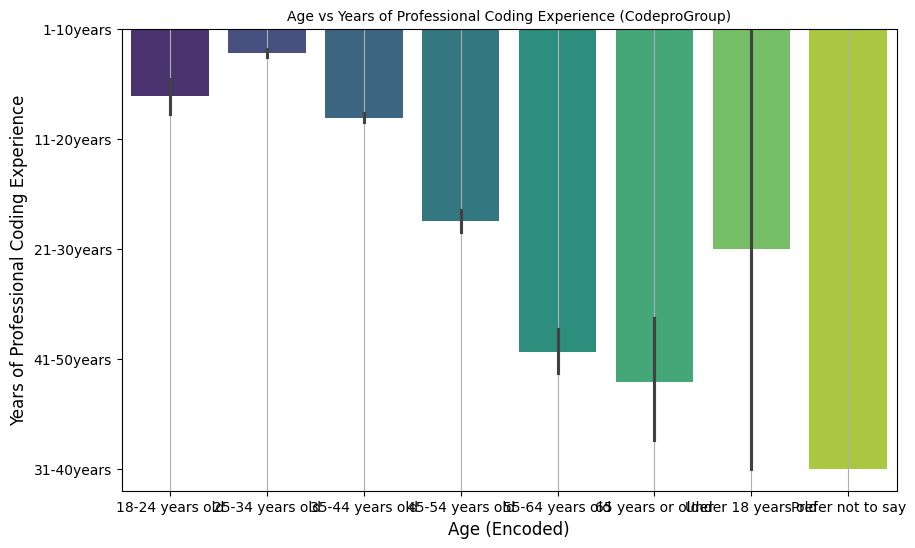

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data,x='Age',y='CodeproGroup', palette='viridis')
plt.title('Age vs Years of Professional Coding Experience (CodeproGroup)', fontsize=10)
plt.xlabel('Age (Encoded)', fontsize=12)
plt.ylabel('Years of Professional Coding Experience', fontsize=12)
plt.grid(axis='x')
plt.show()

/tmp/ipython-input-20238975.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


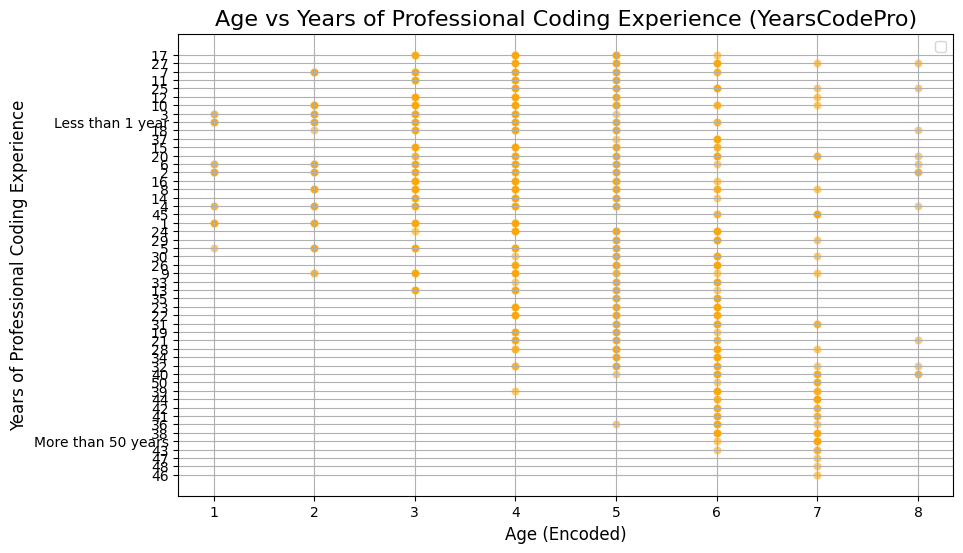

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsCodePro', alpha=0.6, color='orange')
plt.title('Age vs Years of Professional Coding Experience (YearsCodePro)', fontsize=16)
plt.xlabel('Age (Encoded)', fontsize=12)
plt.ylabel('Years of Professional Coding Experience', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Coclusion**
* Strong linear relationship between age and career length. mid career developers is significant increase in experience varience as the age of the participants increases.

<Axes: xlabel='EdLevel'>

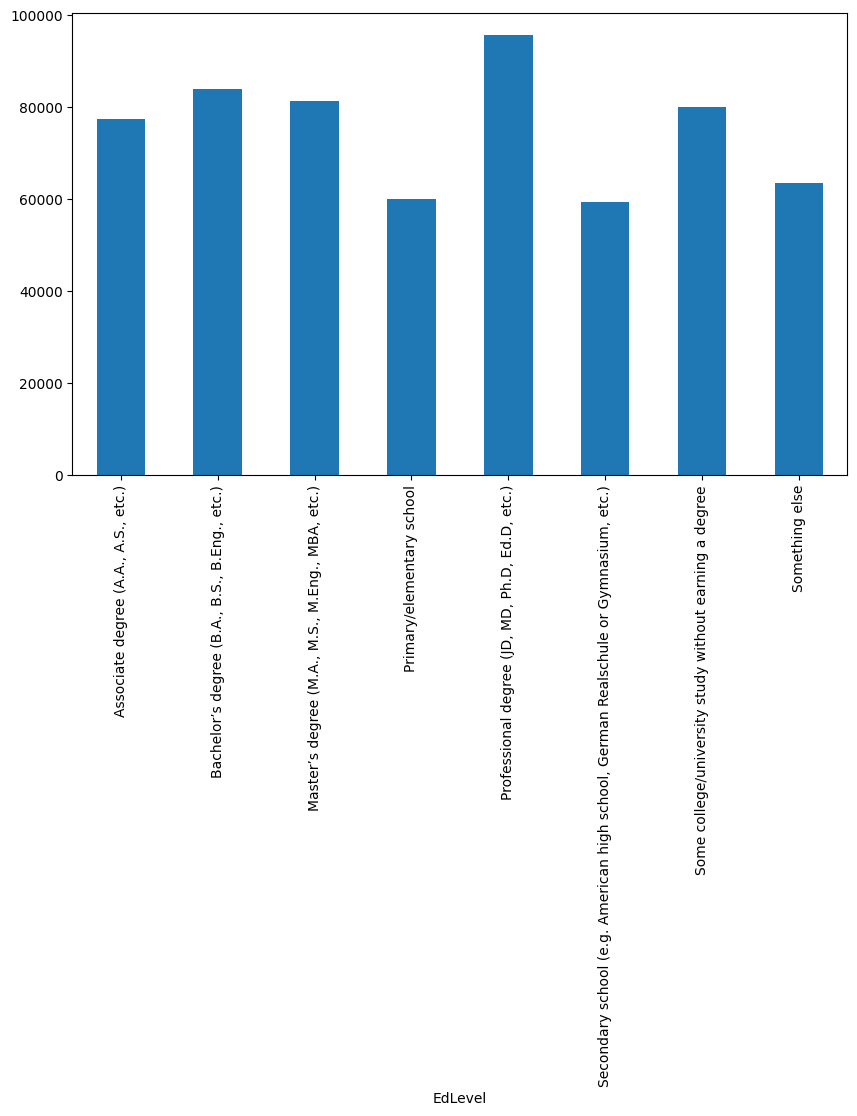

In [87]:
 avg_group= selected_data.groupby('EdLevel')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**


*   Average salary of professional degree(JD,MD,phd etc) is maximum.




/tmp/ipython-input-1584087138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=selected_data, palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
  Text(1, 0, 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'),
  Text(2, 0, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
  Text(3, 0, 'Some college/university study without earning a degree'),
  Text(4, 0, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
  Text(5, 0, 'Associate degree (A.A., A.S., etc.)'),
  Text(6, 0, 'Primary/elementary school'),
  Text(7, 0, 'Something else')])

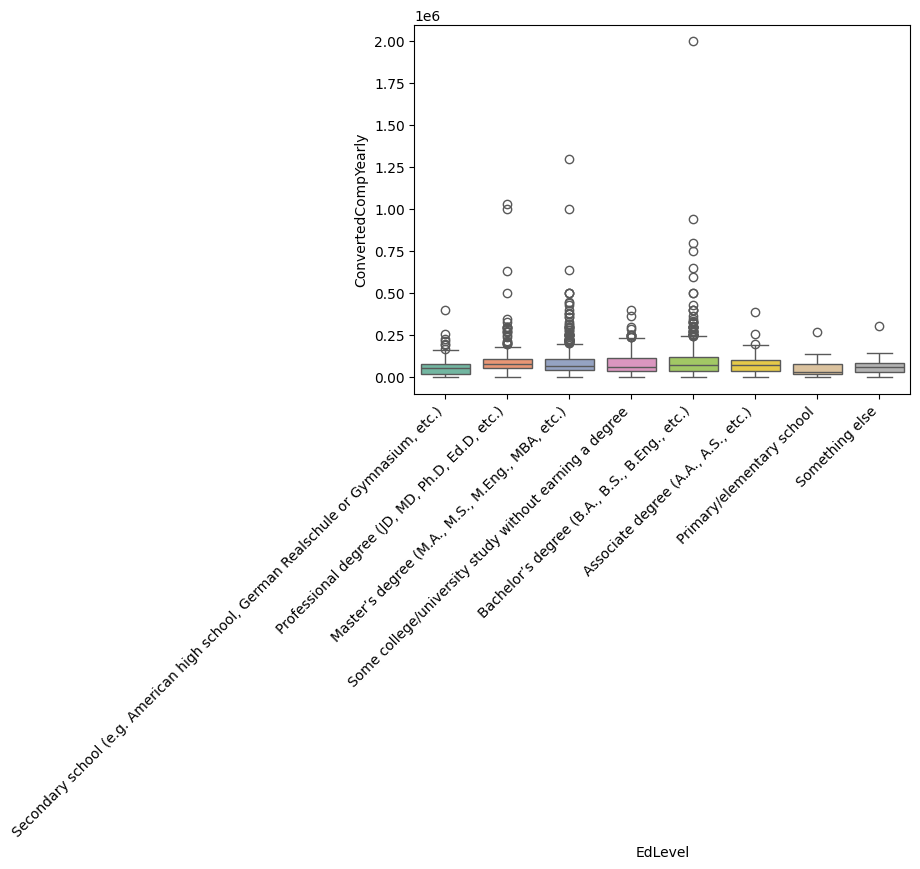

In [88]:
sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=selected_data, palette='Set2')
plt.xticks(rotation=45, ha='right')

**Conclusion**
* Maximum Outliers is persent in Bachelor's Degree.

<Axes: xlabel='mostCountry'>

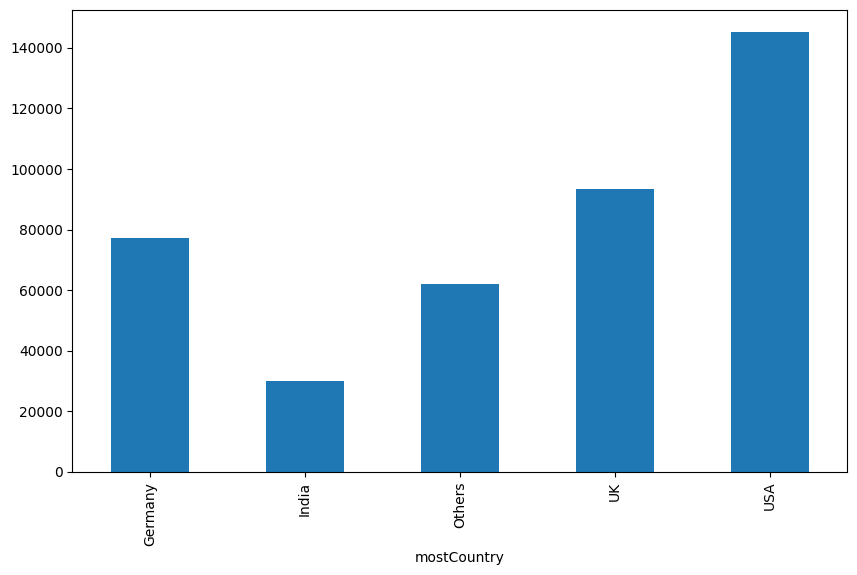

In [89]:
avg_group= selected_data.groupby('mostCountry')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**
* ConvertedCompYearly(Average salary) is maximum in USA Country.

<Axes: xlabel='mostEmployment'>

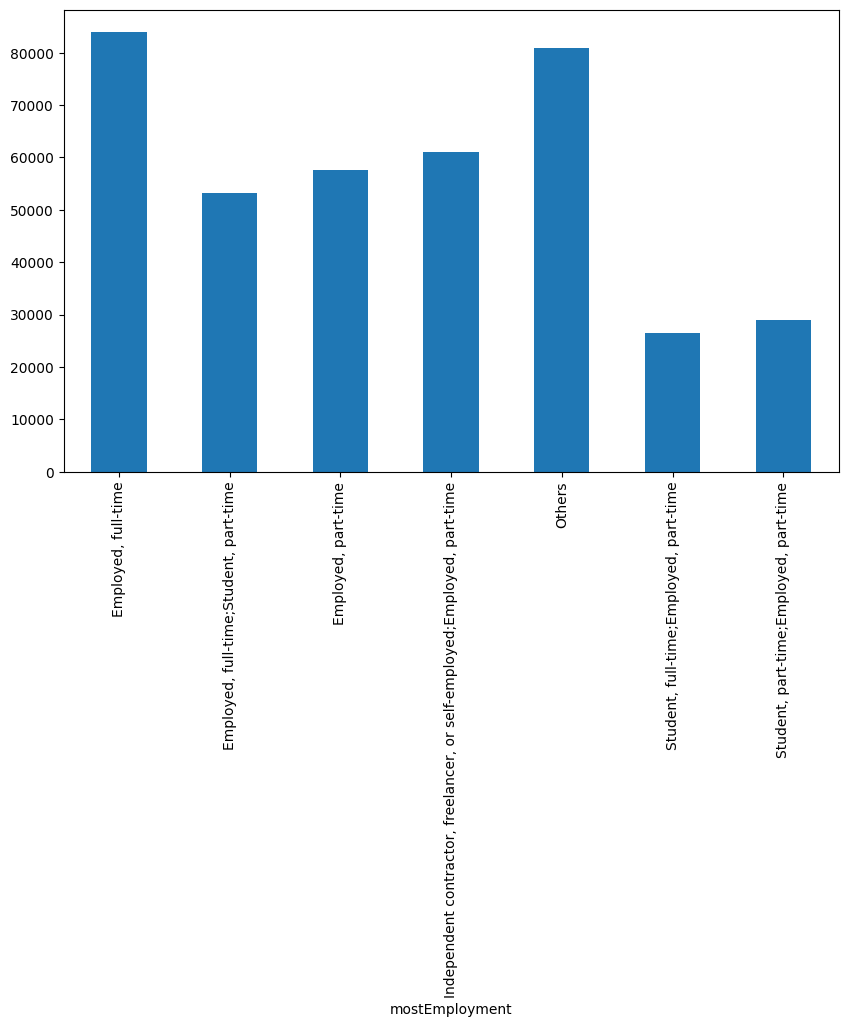

In [90]:
avg_group= selected_data.groupby('mostEmployment')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**


*  Full time employement has maximum salary.



<Axes: xlabel='CodeproGroup'>

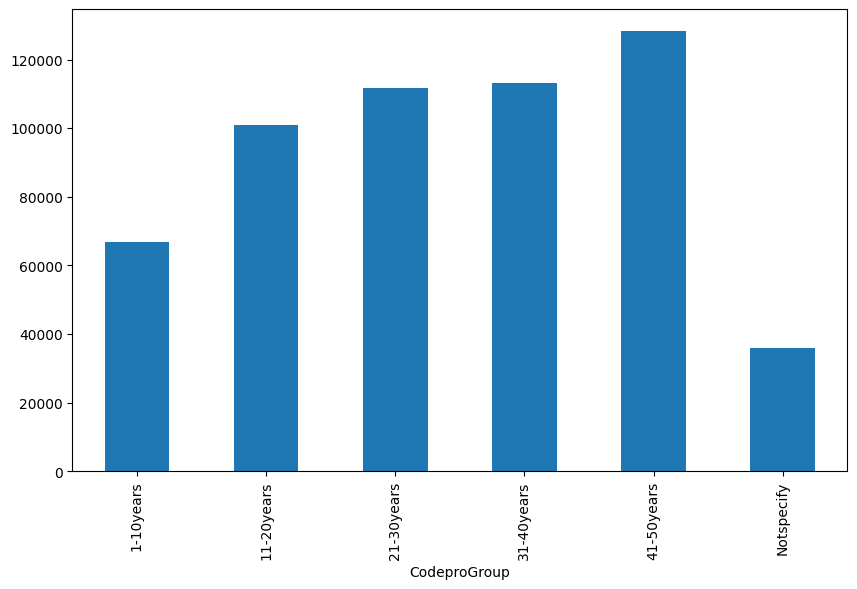

In [91]:
avg_group= selected_data.groupby('CodeproGroup')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**
* 41 -50 year coding experience employee salary is maximum.

<Axes: xlabel='DevType'>

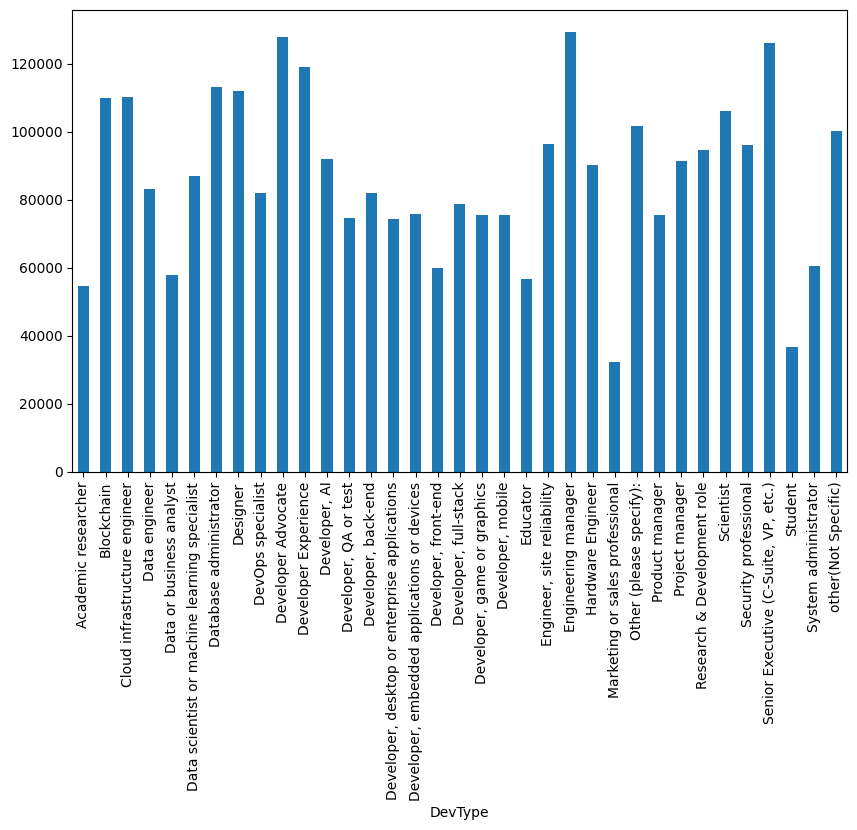

In [92]:
avg_group= selected_data.groupby('DevType')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**
*Average group of Senior Executive(C-Suite,VP,etc.) is maximum average salary.

<Axes: xlabel='MainBranch'>

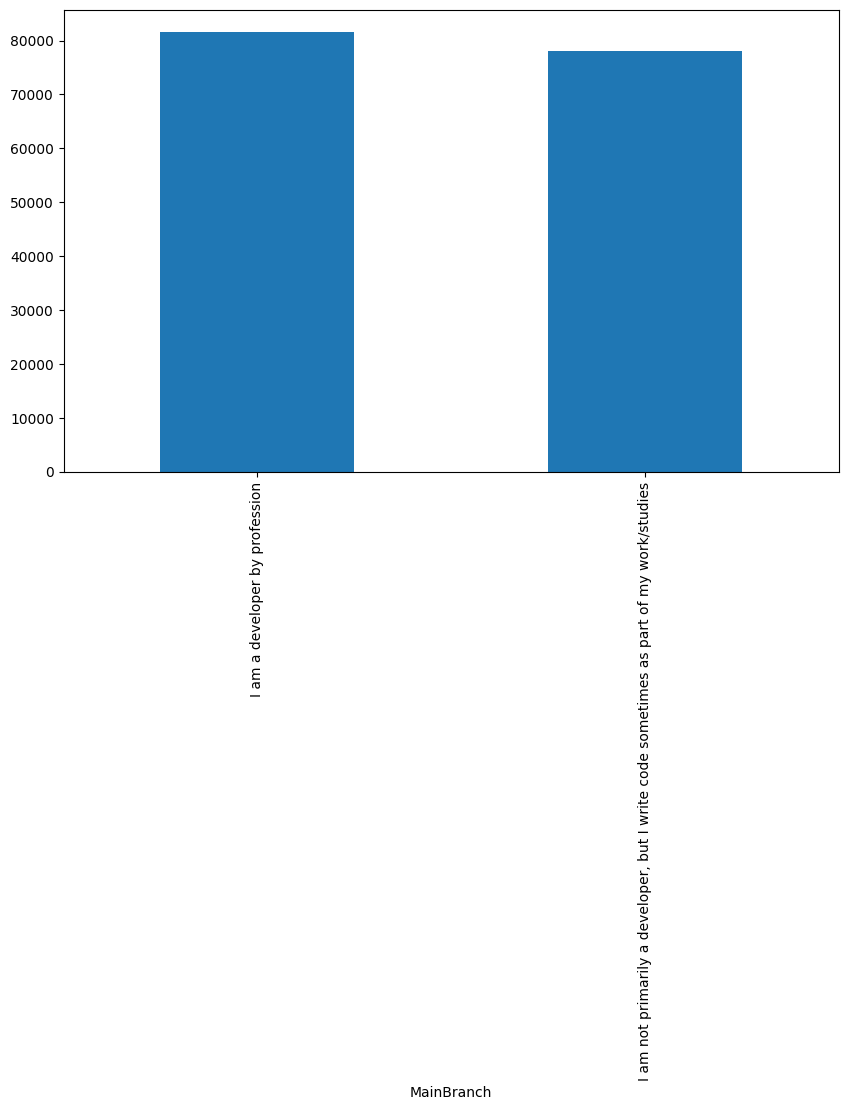

In [93]:
avg_group= selected_data.groupby('MainBranch')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**
I am devolper in main branch average salary is maximum.

<Axes: xlabel='RemoteWork'>

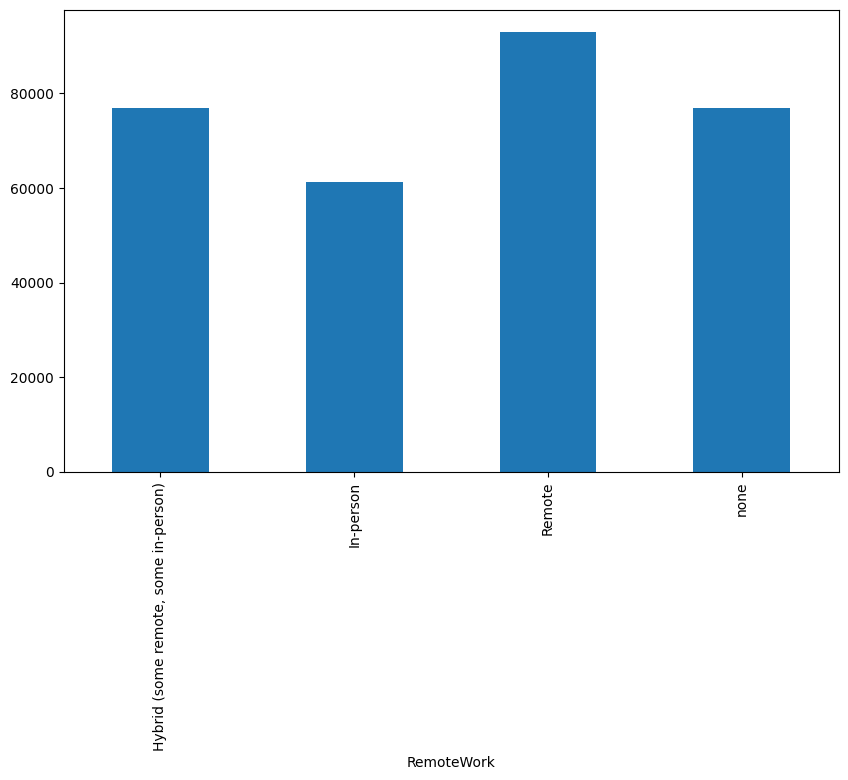

In [94]:
avg_group= selected_data.groupby('RemoteWork')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**
* Average salary is maximum in remote work's person.

<Axes: xlabel='WorkExp'>

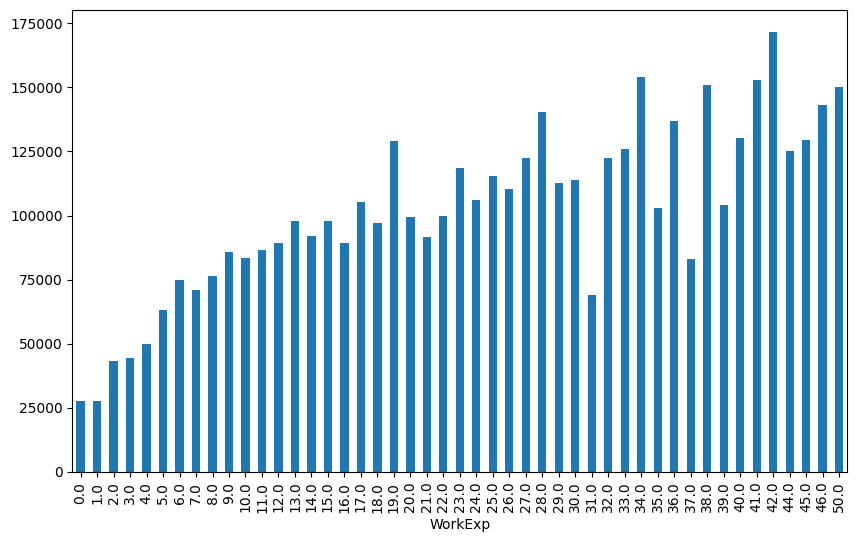

In [95]:
avg_group= selected_data.groupby('WorkExp')

#look at the average income
avg_group['ConvertedCompYearly_capped'].mean()

#describe
avg_group['ConvertedCompYearly_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['ConvertedCompYearly_capped'].mean().plot(kind='bar')

**Conclusion**
* Avergae salary maximum in 34 year work experience people.

<Axes: xlabel='mostCountry'>

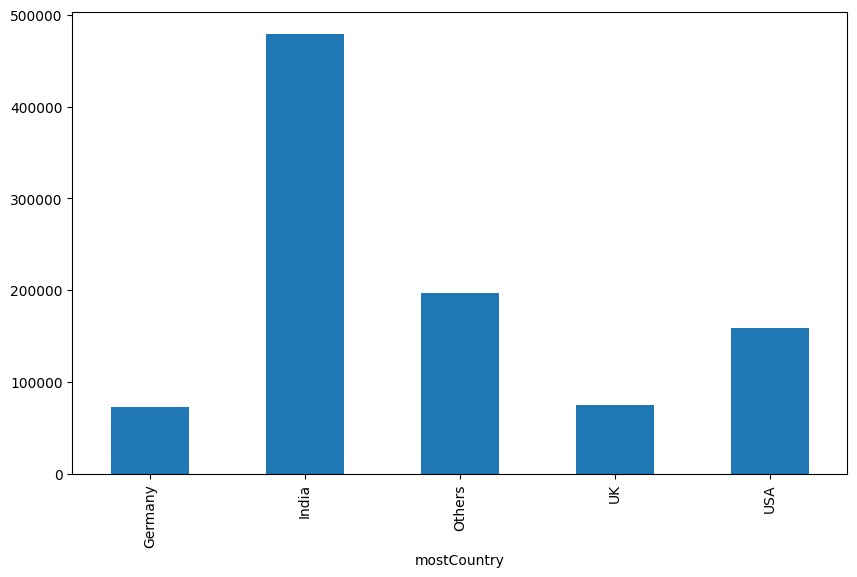

In [96]:
avg_group= selected_data.groupby('mostCountry')

#look at the average income
avg_group['CompTotal_capped'].mean()

#describe
avg_group['CompTotal_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['CompTotal_capped'].mean().plot(kind='bar')

<Axes: xlabel='CodeproGroup'>

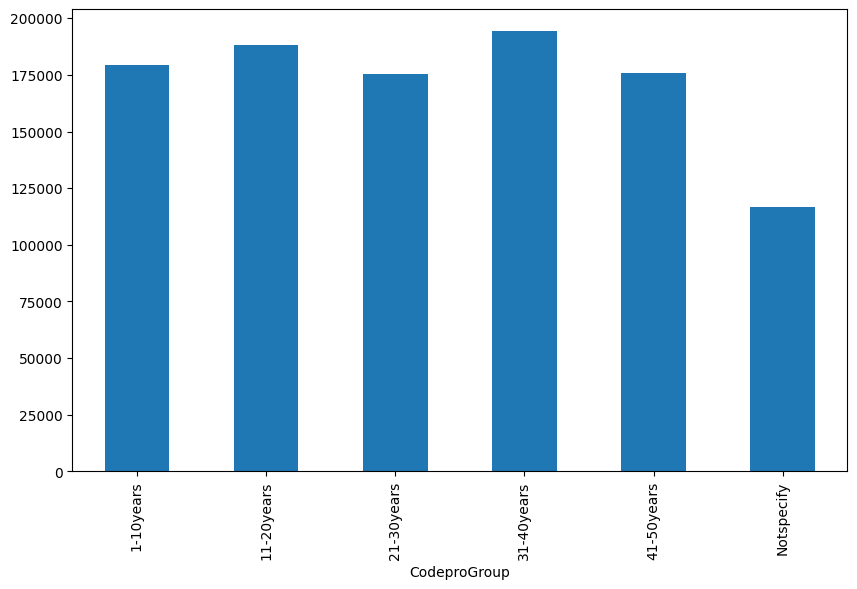

In [97]:
avg_group= selected_data.groupby('CodeproGroup')

#look at the average income
avg_group['CompTotal_capped'].mean()

#describe
avg_group['CompTotal_capped'].describe()


plt.figure(figsize=(10, 6))
avg_group['CompTotal_capped'].mean().plot(kind='bar')

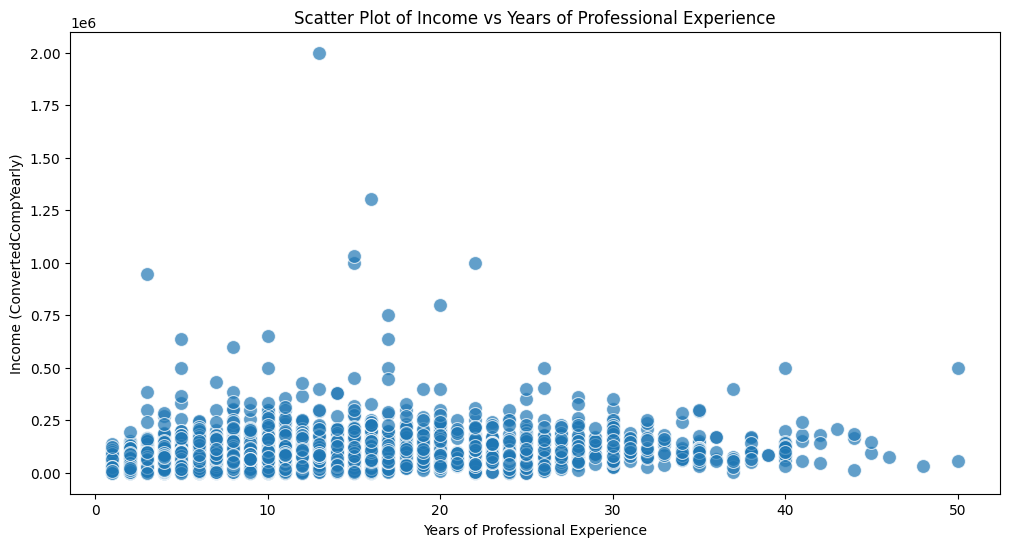

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Income vs. Years of Experience
plt.figure(figsize=(12, 6))

# Use seaborn scatterplot
sns.scatterplot(x='YearsCodePro', y='ConvertedCompYearly', data=selected_data, alpha=0.7, s=100)

# Title and labels
plt.title('Scatter Plot of Income vs Years of Professional Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Income (ConvertedCompYearly)')

# Show the plot
plt.show()

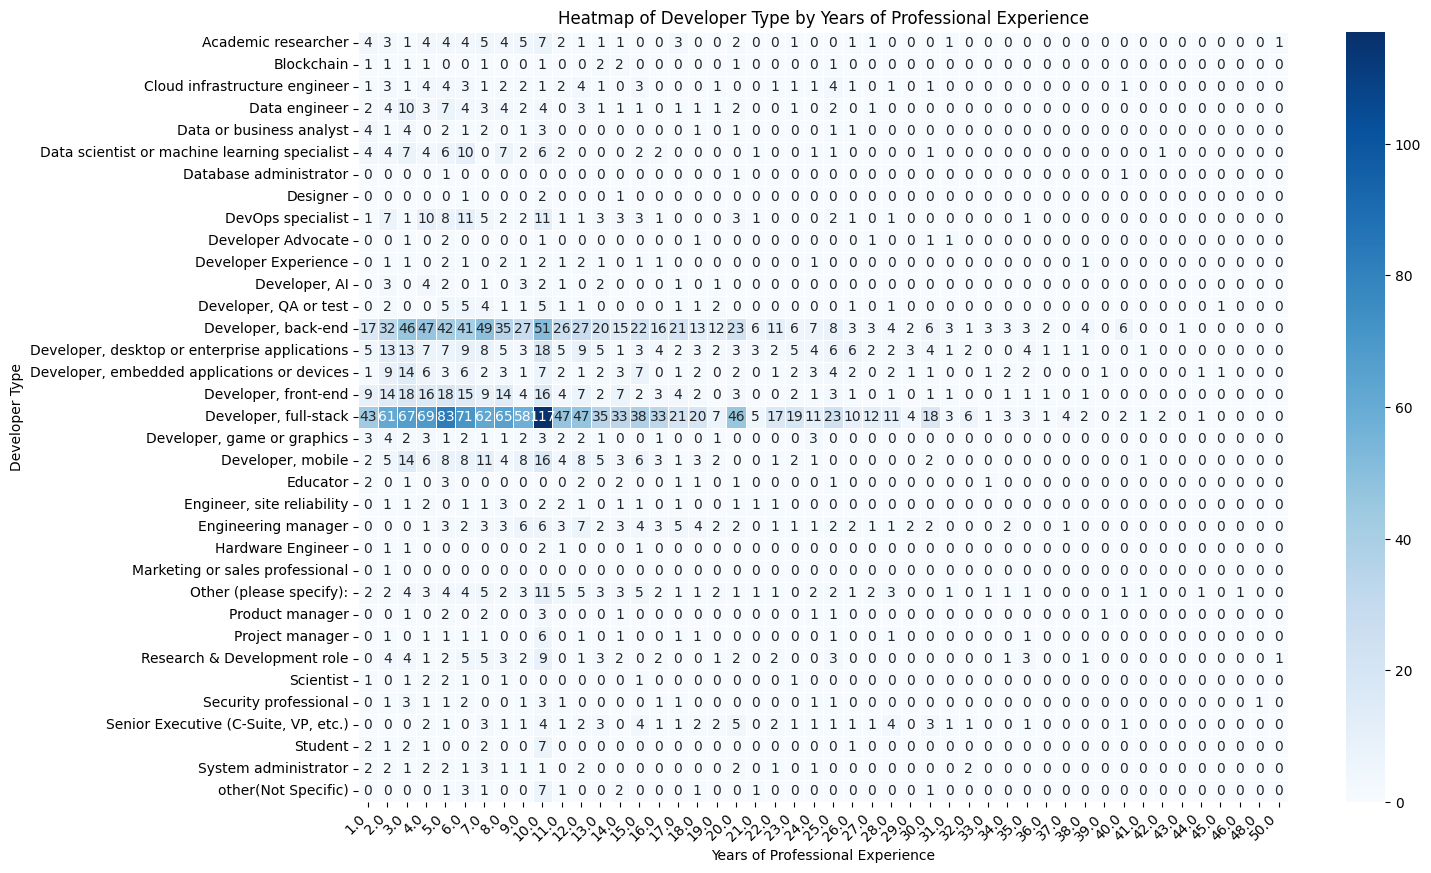

In [99]:
# Cross-tabulation to show the distribution of Developer Types across Years of Professional Experience
cross_tab = pd.crosstab(selected_data['DevType'], selected_data['YearsCodePro'])

# Adjusting the figure size for better readability
plt.figure(figsize=(15, 10))

# Create the heatmap with annotations, and adjusted labels
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)

# Title and labels
plt.title('Heatmap of Developer Type by Years of Professional Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Developer Type')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

**Conclusion**
* The heatmap conclude that technical roles like Full-stack developer are highly saturated in 2 -10 year experience range.

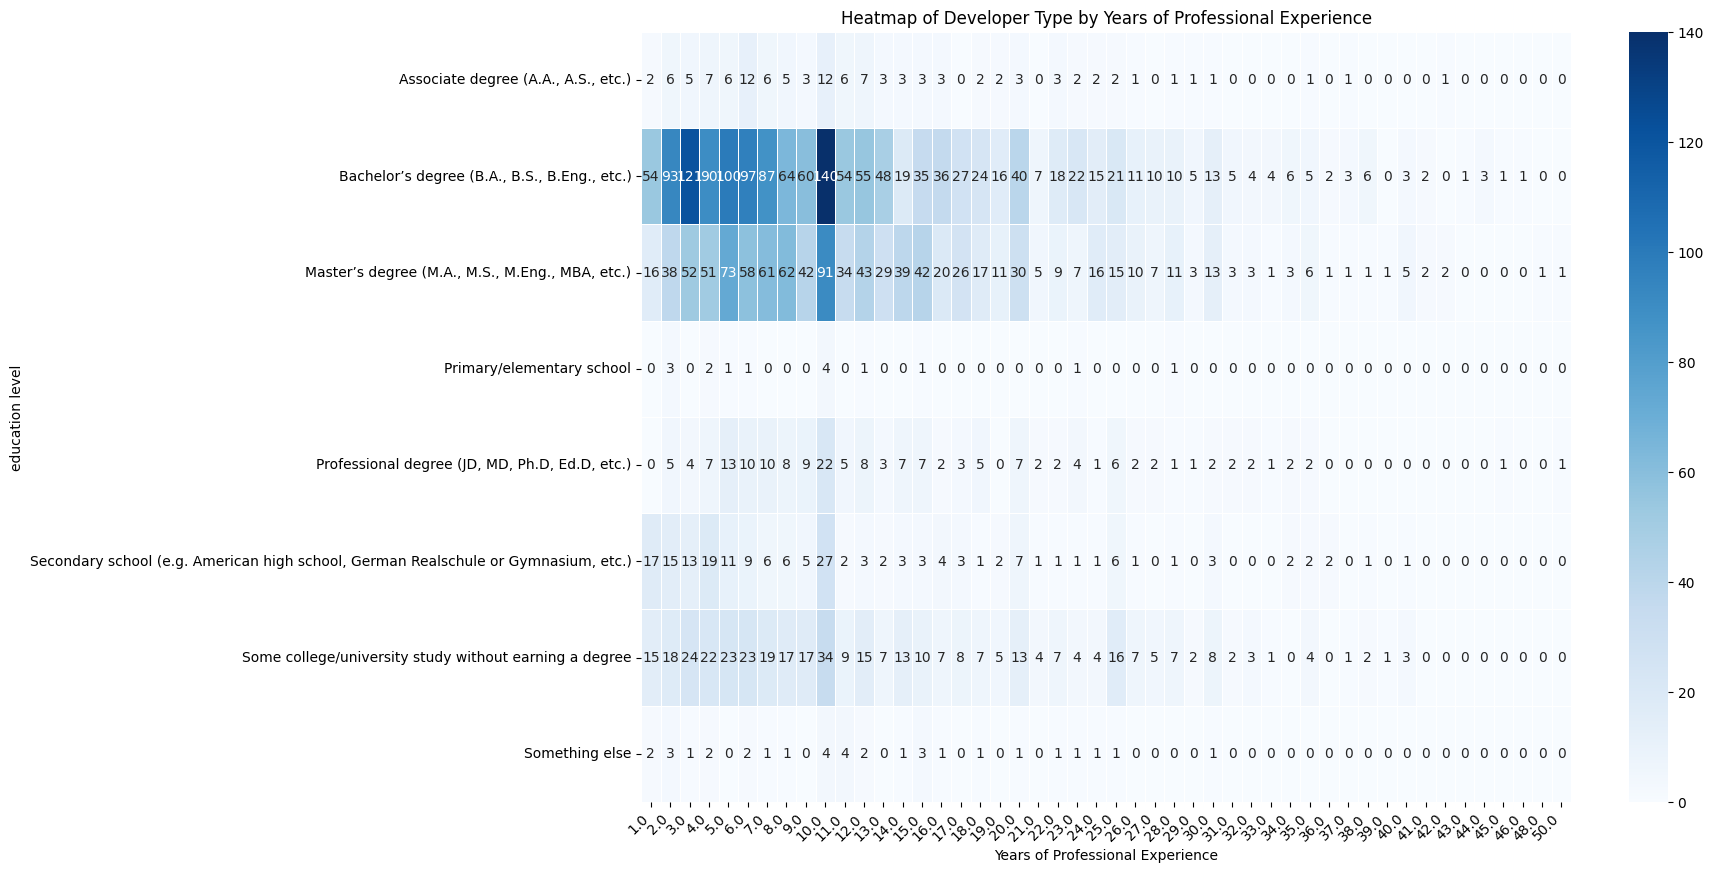

In [100]:
# Cross-tabulation to show the distribution of Developer Types across Years of Professional Experience
cross_tab = pd.crosstab(selected_data['EdLevel'], selected_data['YearsCodePro'])

# Adjusting the figure size for better readability
plt.figure(figsize=(15, 10))

# Create the heatmap with annotations, and adjusted labels
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)

# Title and labels
plt.title('Heatmap of Developer Type by Years of Professional Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('education level')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

**Conclusion**
* The heatmap conclude that education level like Bachelor's degree are highly saturated in 2 -10 year experience range.

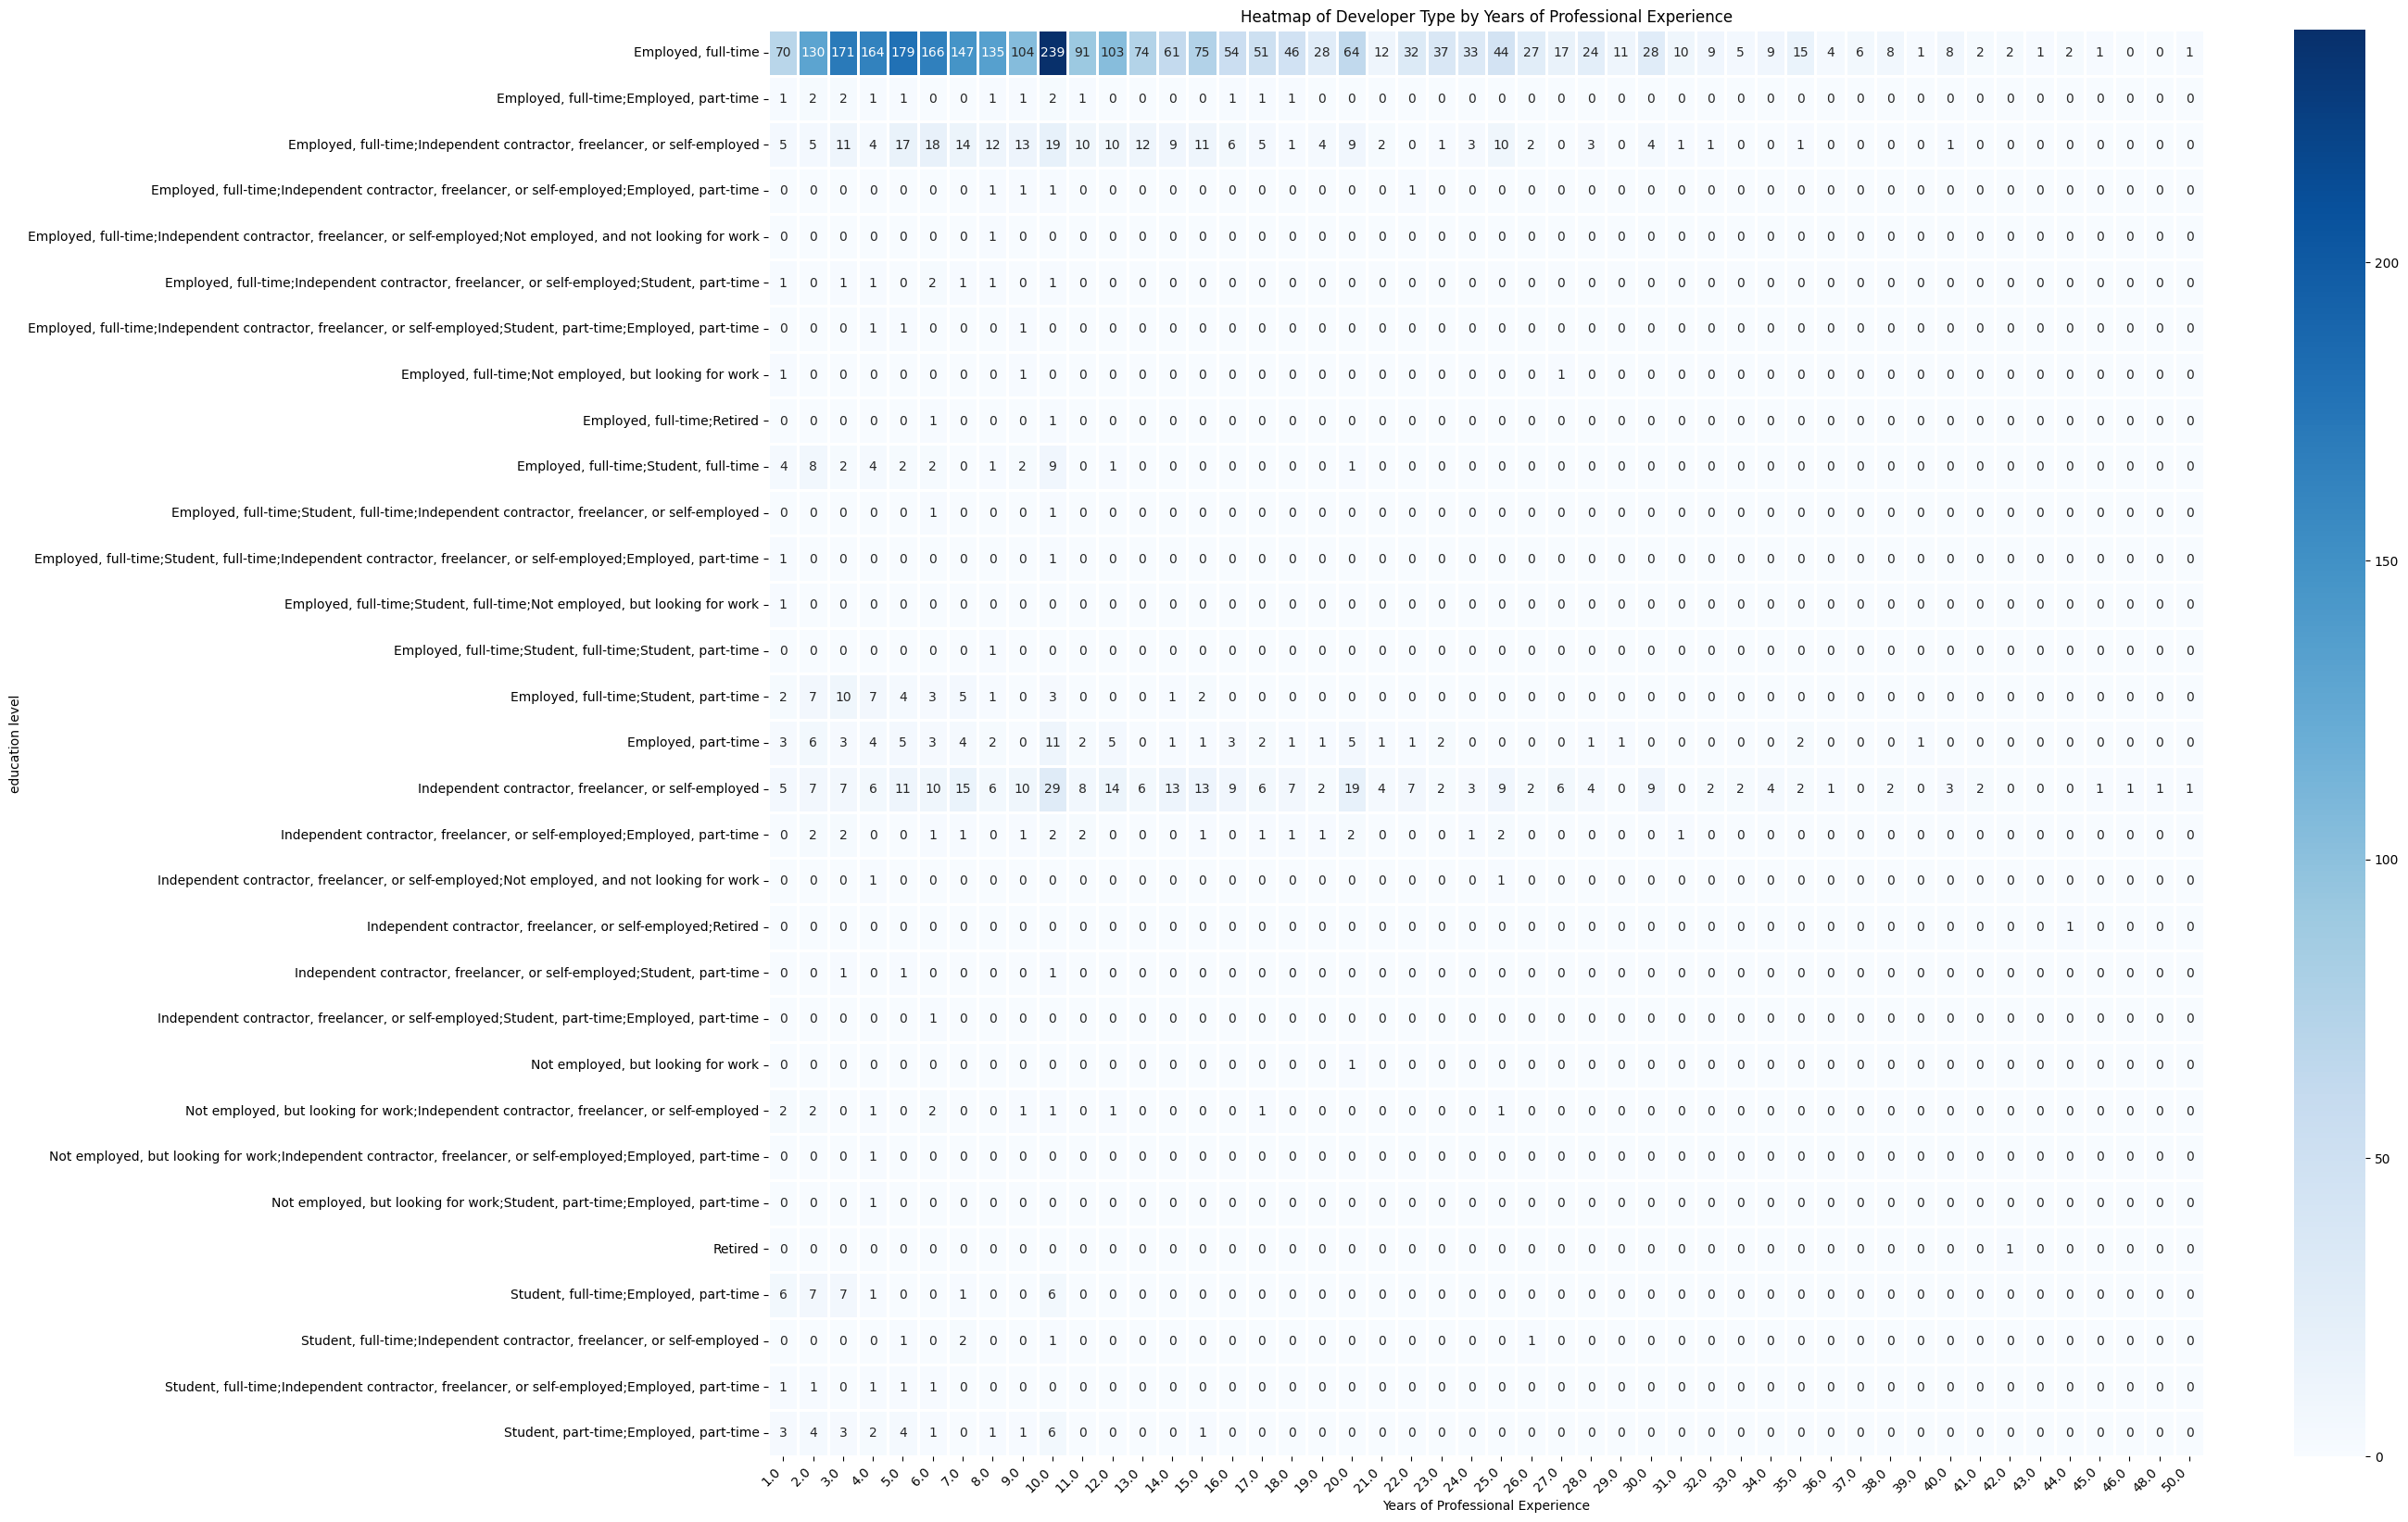

In [101]:
# Cross-tabulation to show the distribution of Developer Types across Years of Professional Experience
cross_tab = pd.crosstab(selected_data['Employment'], selected_data['YearsCodePro'])

# Adjusting the figure size for better readability
plt.figure(figsize=(25, 20))

# Create the heatmap with annotations, and adjusted labels
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths=2)

# Title and labels
plt.title('Heatmap of Developer Type by Years of Professional Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('education level')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

**Conclusion**
* The heatmap conclude that full-time employement are highly saturated in 2 -16 year experience range.

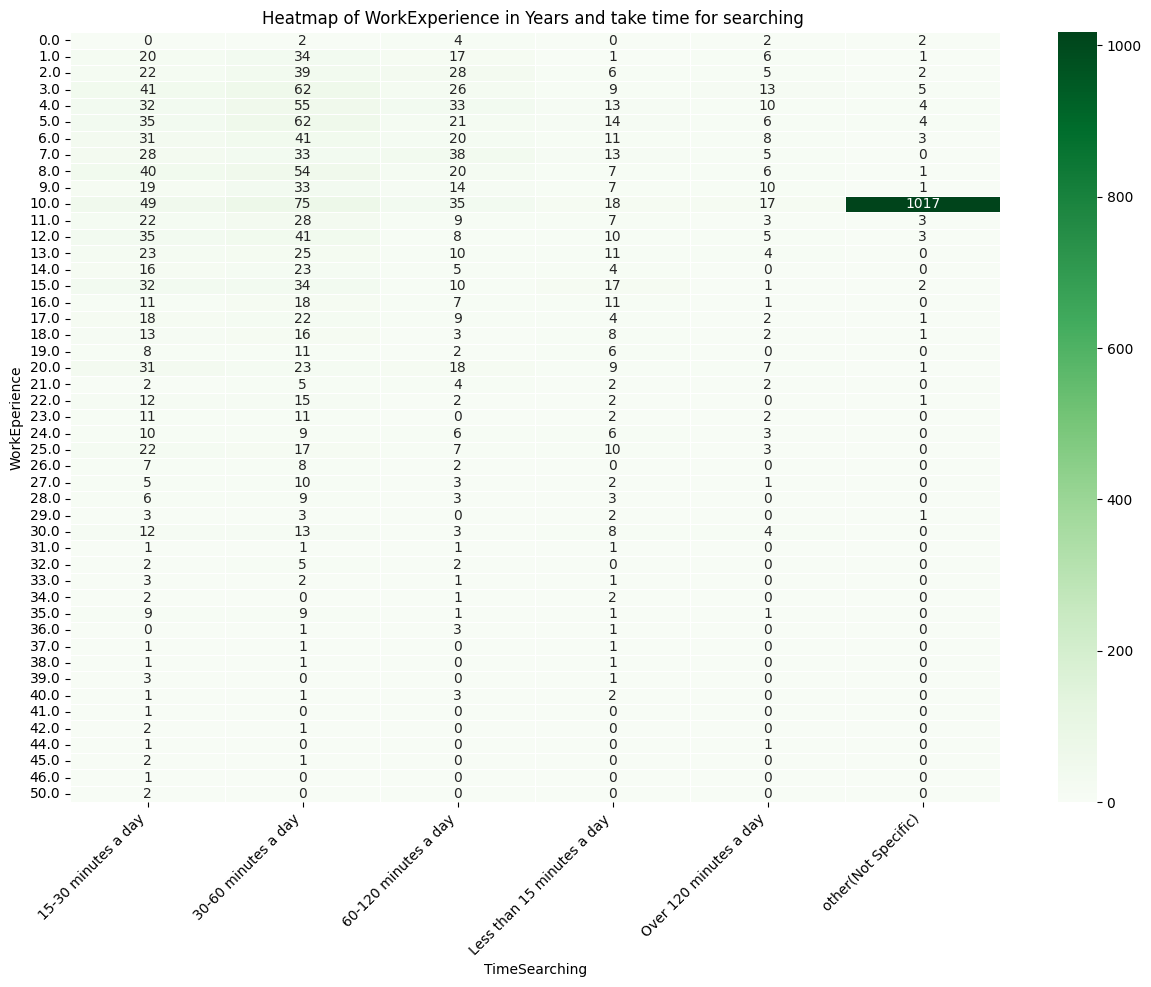

In [102]:
# Cross-tabulation to show the distribution of Developer Types across Years of Professional Experience
cross_tab = pd.crosstab(selected_data['WorkExp'], selected_data['TimeSearching'])

# Adjusting the figure size for better readability
plt.figure(figsize=(15, 10))

# Create the heatmap with annotations, and adjusted labels
sns.heatmap(cross_tab, annot=True, cmap='Greens', fmt='d', linewidths=0.5)

# Title and labels
plt.title('Heatmap of WorkExperience in Years and take time for searching ')
plt.xlabel('TimeSearching')
plt.ylabel('WorkEperience')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

**Conclusion**
* 3 year second largest number od work Experience people searching time 30 to 60 minutes and 9 year first largest number of work experience people are not specify of time searching